In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, datetime

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [3]:
df = pd.read_csv("Data/ConsumerElectronics.csv")
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [4]:
# The dataset seesm to have entries with '\N' & whitespaces, so reimporting it
df = pd.read_csv("Data/ConsumerElectronics.csv", na_values=['\\N', ' '])
df.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,NaN,NaN,COD,5,-1.012991e+18,-7.791756e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,NaN,NaN,COD,7,-8.990325e+18,7.335411e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,NaN,NaN,COD,10,-1.040443e+18,-7.477688e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,NaN,NaN,Prepaid,6,2.894557e+18,5.347354e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [5]:
df.shape

(1648824, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1643920 non-null  float64
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    335852 non-null   float64
 9   deliverycdays                    335853 non-null   float64
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [7]:
# Count of orders for different sub categories

cols = df.iloc[:, 15:20]

for col in cols:
    value_counts = cols[col].value_counts()
    percentage = (value_counts/value_counts.sum())*100

    value_counts_df = pd.DataFrame({'Count':value_counts,
                                   'Percentage':percentage})
    
    print(f"the order count in {col} is:")
    print(value_counts_df)
    print("\n" + "-"*50 + "\n")

the order count in product_analytic_category is:
                            Count  Percentage
product_analytic_category                    
EntertainmentSmall         944698   57.295260
CameraAccessory            257493   15.616767
GamingHardware             230958   14.007438
GameCDDVD                  114503    6.944525
Camera                     101172    6.136010

--------------------------------------------------

the order count in product_analytic_sub_category is:
                                Count  Percentage
product_analytic_sub_category                    
Speaker                        543928   32.988845
CameraAccessory                239508   14.525989
GamingAccessory                201899   12.245030
TVVideoSmall                   142995    8.672545
HomeAudio                      124860    7.572670
Game                           114406    6.938642
AudioMP3Player                 112892    6.846819
Camera                         101172    6.136010
GamingConsole          

In [8]:
# Order counts for categories of Interst

sub_cats = ['CameraAccessory', 'GamingAccessory', 'HomeAudio']

counts = df['product_analytic_sub_category'].value_counts()
filtered_counts = counts.loc[sub_cats].sort_values(ascending=False)
percentage = (filtered_counts/value_counts.sum())*100

results_df = pd.DataFrame({'Count':filtered_counts,
                          'Percentage':percentage})
results_df

,Count,Percentage
product_analytic_sub_category,,
CameraAccessory,239508,14.525989
GamingAccessory,201899,12.245030
HomeAudio,124860,7.572670


# Data Duplication Analysis

In [9]:
df.shape

(1648824, 20)

In [10]:
# Checking for entirely duplicated rows
total_row_dup = df.duplicated().sum()
print(f"Total fully duplicate rows: {total_row_dup}")
print(f"Total percent of duplicated rows: {round(total_row_dup/df.shape[0], 3)*100}%")

Total fully duplicate rows: 104843
Total percent of duplicated rows: 6.4%


In [11]:
# Check for duplicate Order_Ids
order_id_dupes = df['order_id'].duplicated().sum()
print(f"Total number of duplicate order_ids in the dataset is {order_id_dupes}")

# If order_id duplicates exist, the same order was recorded multiple times.

Total number of duplicate order_ids in the dataset is 147647


In [12]:
# counting duplicate occurences of order_id and order_item_id
order_item_dupes = df.duplicated(subset=['order_id', 'order_item_id']).sum()
print(f"Number of duplicate order_id + order_item_id: {order_item_dupes}")

# If order_id + order_item_id is duplicated, it might mean duplicate transactions for the same product.")

Number of duplicate order_id + order_item_id: 140114


In [13]:
# Find orders where order_id is repeated, but units are different
dupe_variations = df.groupby(['order_id']).nunique()
dupe_variations = dupe_variations[(dupe_variations['units'] > 1) | (dupe_variations['gmv'] > 1)]

print(f"Number of orders with varying units or GMV: {len(dupe_variations)}")

# If an order_id appears multiple times with different units or gmv, the same order was recorded with modifications.

Number of orders with varying units or GMV: 25443


In [14]:
# looking at sample duplicate records
duplicate_rows = df[df.duplicated(subset=['order_id', 'order_item_id'], keep=False)]
print("Sample Duplicate Records:")
duplicate_rows.head(10)

Sample Duplicate Records:


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,NaN,NaN,Prepaid,4,-7.604961e+18,-5.835932e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3.419189e+15,3.419189e+15,3324.0,1,NaN,NaN,Prepaid,5,-7.641546e+18,-1.919053e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
33,ACCCX3SG2GG9YYAH,2015-10-16 09:47:01,2015,10,4.418241e+15,4.418241e+15,6073.0,1,NaN,NaN,Prepaid,5,6.372566e+18,-9.779010e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,0
41,ACCCX3SG2GG9YYAH,2015-10-28 13:15:38,2015,10,1.428733e+15,1.428733e+15,6749.0,1,NaN,NaN,Prepaid,5,-6.954482e+18,-8.020114e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,0
48,ACCCX3SGAR6NNBMR,2015-10-16 01:51:06,2015,10,4.417942e+15,4.417942e+15,6554.0,1,NaN,NaN,Prepaid,4,6.374130e+18,-3.888685e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
50,ACCCX3SGAR6NNBMR,2015-10-16 12:17:31,2015,10,2.418332e+15,2.418332e+15,6133.0,1,NaN,NaN,Prepaid,6,4.478154e+18,3.666648e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
51,ACCCX3SGAR6NNBMR,2015-10-17 11:14:10,2015,10,2.419157e+15,2.419157e+15,6695.0,1,NaN,NaN,Prepaid,7,1.861850e+17,-9.779010e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,5
53,ACCCX3SGAR6NNBMR,2015-10-28 20:53:12,2015,10,2.429007e+15,2.429007e+15,6589.0,1,NaN,NaN,Prepaid,6,-2.301456e+18,-6.882949e+17,CE,CameraAccessory,CameraAccessory,Lens,7150,5
56,ACCCX3SGAR6NNBMR,2015-10-16 20:16:58,2015,10,4.418621e+15,4.418621e+15,6695.0,1,NaN,NaN,COD,5,2.530467e+18,-3.069717e+18,CE,CameraAccessory,CameraAccessory,Lens,7150,5
58,ACCCX3SGAR6NNBMR,2015-10-16 06:36:36,2015,10,3.418128e+15,3.418128e+15,6533.0,1,NaN,NaN,COD,5,-7.503869e+18,3.240840e+16,CE,CameraAccessory,CameraAccessory,Lens,7150,5


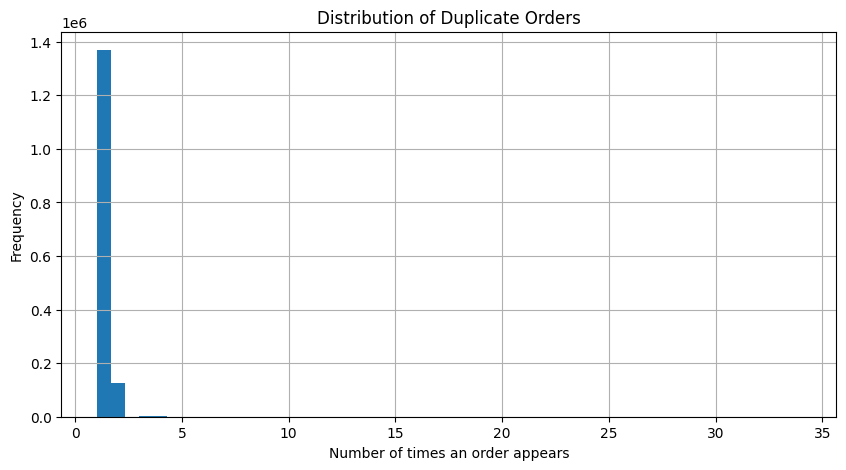

In [15]:
import matplotlib.pyplot as plt

# Count occurrences of each order_id
order_counts = df['order_id'].value_counts()

# Plot histogram of order frequencies
plt.figure(figsize=(10,5))
order_counts.hist(bins=50)
plt.xlabel("Number of times an order appears")
plt.ylabel("Frequency")
plt.title("Distribution of Duplicate Orders")
plt.show()

# Data Cleaning

In [16]:
# Dropping duplicate entries from the dataset on basis of order_date, order_id, order_item_id and number of units
df = df.drop_duplicates(subset=['order_date',
                               'order_id',
                               'order_item_id',
                               'units'],
                        keep="first",
                       inplace=False)

In [17]:
df.shape

(1536296, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1536296 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1536296 non-null  object 
 1   order_date                       1536296 non-null  object 
 2   Year                             1536296 non-null  int64  
 3   Month                            1536296 non-null  int64  
 4   order_id                         1536296 non-null  float64
 5   order_item_id                    1536296 non-null  float64
 6   gmv                              1532278 non-null  float64
 7   units                            1536296 non-null  int64  
 8   deliverybdays                    333933 non-null   float64
 9   deliverycdays                    333934 non-null   float64
 10  s1_fact.order_payment_type       1536296 non-null  object 
 11  sla                              1536296 non-null  int6

In [19]:
# removing scientific notifications from order NumericIDs
cols = ['cust_id', 'order_id', 'order_item_id', 'pincode']
df[cols] = df[cols].astype(str)

In [20]:
# Changing the Data Type of date columns
df['order_datetime'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d %H:%M:%S')
df['order_date'] = df['order_datetime'].dt.normalize()

In [21]:
df['order_date'].info()

<class 'pandas.core.series.Series'>
Index: 1536296 entries, 0 to 1543996
Series name: order_date
Non-Null Count    Dtype         
--------------    -----         
1536296 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.4 MB


In [22]:
# Looking at only the date range from  July 2015 to June 2016
start_date = pd.to_datetime("2015-07-01")
end_date = pd.to_datetime("2016-06-30")
df = df[(df['order_date']>= start_date) & (df['order_date']<= end_date)]

In [23]:
# Create the order Week Column
df['order_week'] = df['order_date'].dt.isocalendar().week

In [24]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,NaN,NaN,...,-1.01299130778588e+18,-7.79175582905735e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,NaN,NaN,...,-8.99032457905512e+18,7.33541149097431e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,NaN,NaN,...,-1.0404429420466e+18,-7.47768776228657e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,NaN,NaN,...,-7.60496084352714e+18,-5.83593163877661e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,NaN,NaN,...,2.8945572083453e+18,5.34735360997242e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


# Null Value Analysis and Treatment

In [25]:
def null_counts(df):
    null_counts = df.isnull().sum()
    null_percentage = round(100* (null_counts/len(df)), 2)
    
    if null_counts.empty or null_percentage.empty:
        print("NO missing values detected in the datset")
    
    else:
        null_df = pd.DataFrame({
        'Missing Count':null_counts,
        'Missing Percentage':null_percentage})

    null_df = null_df[null_df['Missing Count']>0]
    null_df = null_df.sort_values(by="Missing Percentage", 
                                 ascending=False)
    return(null_df)


null_counts(df)

,Missing Count,Missing Percentage
deliverybdays,1202262,78.29
deliverycdays,1202261,78.29
product_analytic_vertical,5794,0.38
gmv,4018,0.26


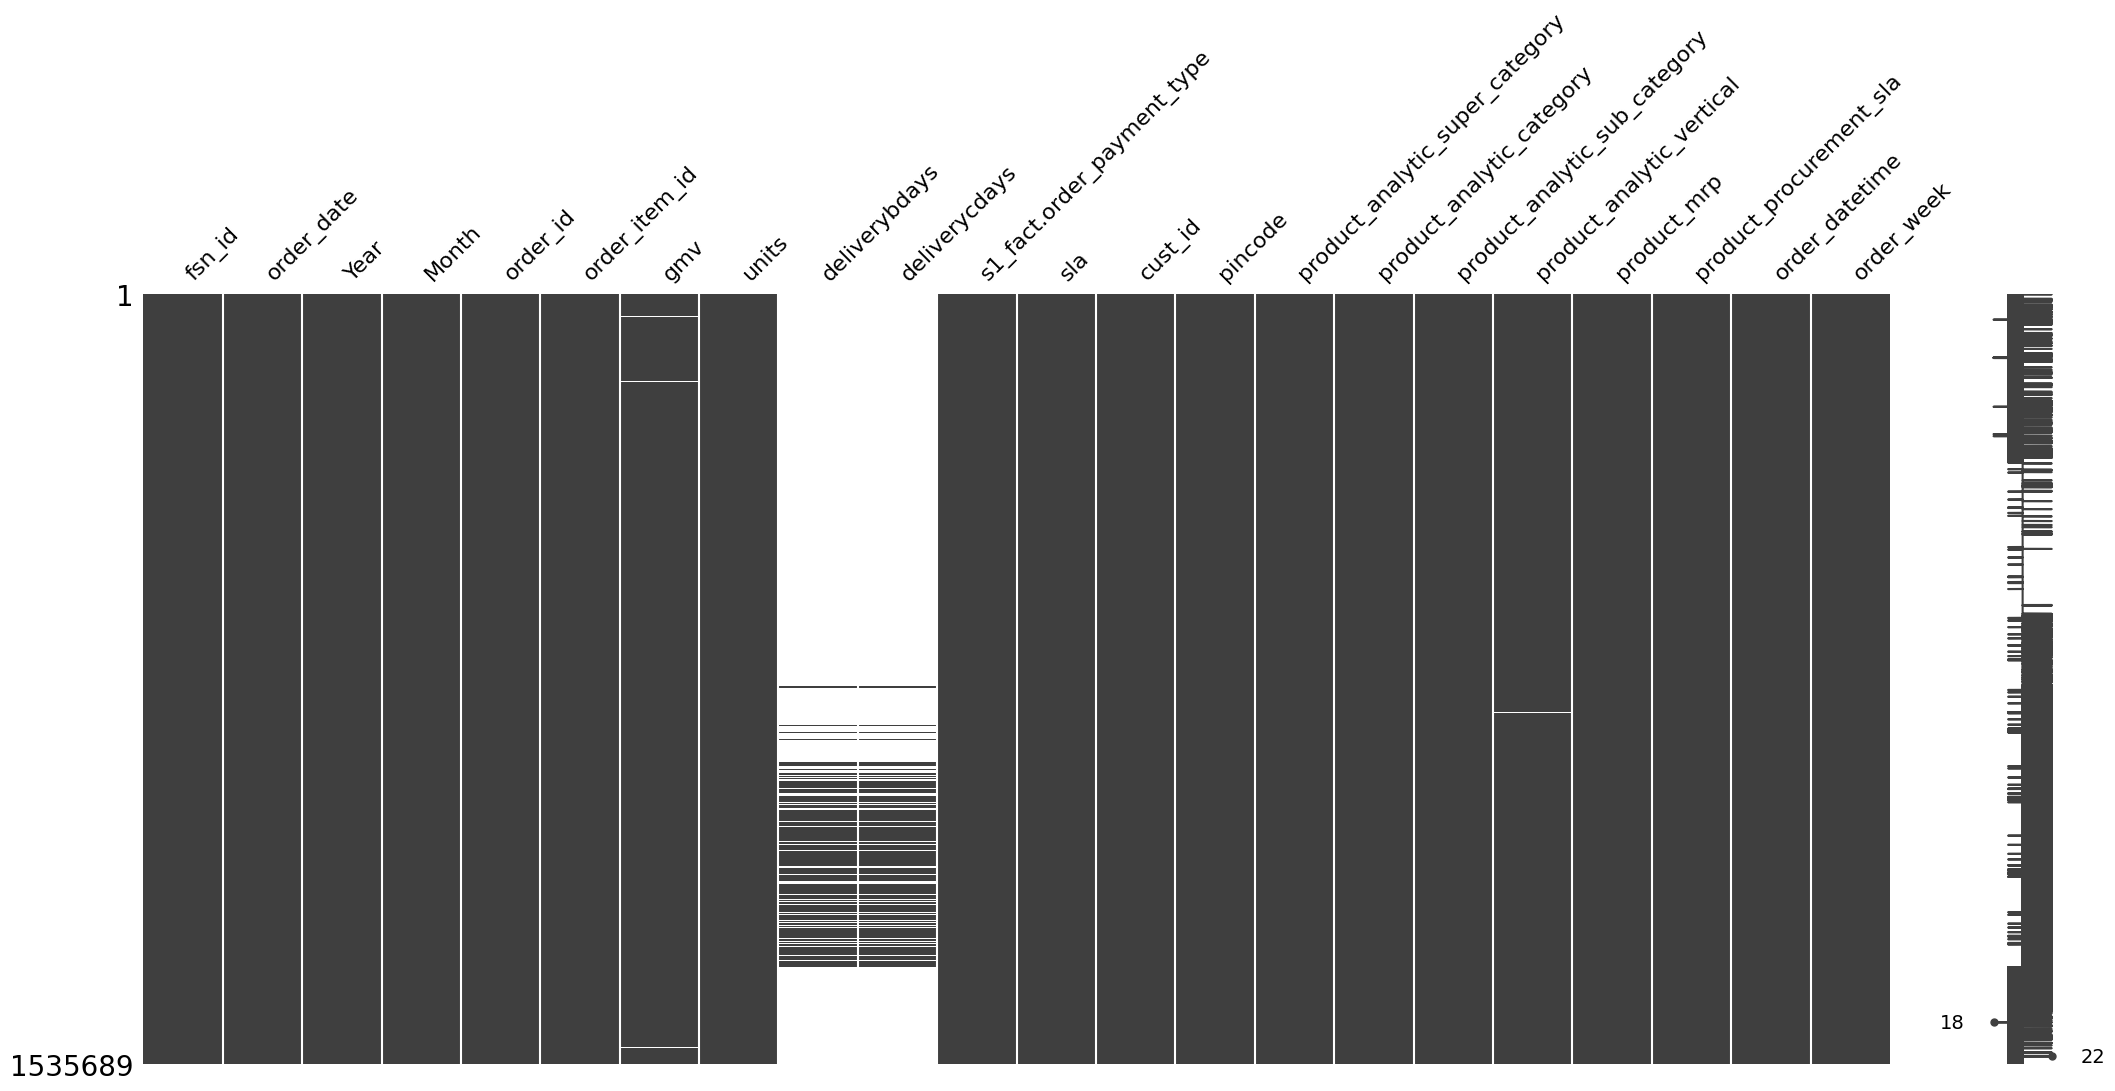

In [26]:
# Plotting Null Values
msno.matrix(df)
plt.show()

In [27]:
# Dropping Columns with huge number of Nulls
df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,COD,5,-1.01299130778588e+18,-7.79175582905735e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,COD,7,-8.99032457905512e+18,7.33541149097431e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,COD,10,-1.0404429420466e+18,-7.47768776228657e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,Prepaid,4,-7.60496084352714e+18,-5.83593163877661e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,Prepaid,6,2.8945572083453e+18,5.34735360997242e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [28]:
# Dropping rows where 'product_analytics_Vertical' & 'gmv' are null 
df.dropna(subset=['product_analytic_vertical', 'gmv'], inplace=True)

In [29]:
# Recheck for null values
null_counts(df)

,Missing Count,Missing Percentage


In [30]:
df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 's1_fact.order_payment_type', 'sla', 'cust_id',
       'pincode', 'product_analytic_super_category',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'order_datetime', 'order_week'],
      dtype='object')

In [31]:
# Adjusting order weeek for consistency:
def order_week(order_week, year):
    if (year == 2016 and order_week<=26):
        return order_week + 53
    return order_week

df['order_week'] = df.apply(lambda x: order_week(x['order_week'], x['Year']), axis=1)

In [32]:
df.head(5)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_datetime,order_week
0,ACCCX3S58G7B5F6P,2015-10-17,2015,10,3419300926147000.0,3419300926147000.0,6400.0,1,COD,5,-1.01299130778588e+18,-7.79175582905735e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-17 15:11:54,42
1,ACCCX3S58G7B5F6P,2015-10-19,2015,10,1420830839915200.0,1420830839915200.0,6900.0,1,COD,7,-8.99032457905512e+18,7.33541149097431e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,2015-10-19 10:07:22,43
2,ACCCX3S5AHMF55FV,2015-10-20,2015,10,2421912925714800.0,2421912925714800.0,1990.0,1,COD,10,-1.0404429420466e+18,-7.47768776228657e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-20 15:45:56,43
3,ACCCX3S5AHMF55FV,2015-10-14,2015,10,4416592101738400.0,4416592101738400.0,1690.0,1,Prepaid,4,-7.60496084352714e+18,-5.83593163877661e+18,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-14 12:05:15,42
4,ACCCX3S5AHMF55FV,2015-10-17,2015,10,4419525153426400.0,4419525153426400.0,1618.0,1,Prepaid,6,2.8945572083453e+18,5.34735360997242e+17,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,2015-10-17 21:25:03,42


In [33]:
# df.to_csv("debug.csv")
# df['order_week'].value_counts()

In [34]:
# removing transactions where 'product_mrp' = 0 (invalid pricing)
if 'product_mrp' in df.columns:
    df = df[df['product_mrp'] != 0]


print(len(df[df['gmv'] == 0.0]))

940


In [35]:
# Remove transactions where `gmv` = 0 (invalid revenue)
if 'gmv' in df.columns:
    df = df[df['gmv'] != 0]

print(len(df[df['gmv'] == 0]))

0


In [36]:
# Remove records where `gmv` exceeds possible max revenue (`product_mrp * units`)
if {'gmv', 'product_mrp', 'units'}.issubset(df.columns):
    df = df[df['gmv'] <= (df['product_mrp'] * df['units'])]
    print("Removed transactions where `gmv` exceeded `product_mrp * units`.")


Removed transactions where `gmv` exceeded `product_mrp * units`.


In [37]:
# Verify Final Null Value Counts
print("Remaining Null Values After Treatment:\n", df.isnull().sum())

Remaining Null Values After Treatment:
 fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
order_datetime                     0
order_week                         0
dtype: int64


# Outlier Analysis & Treatment

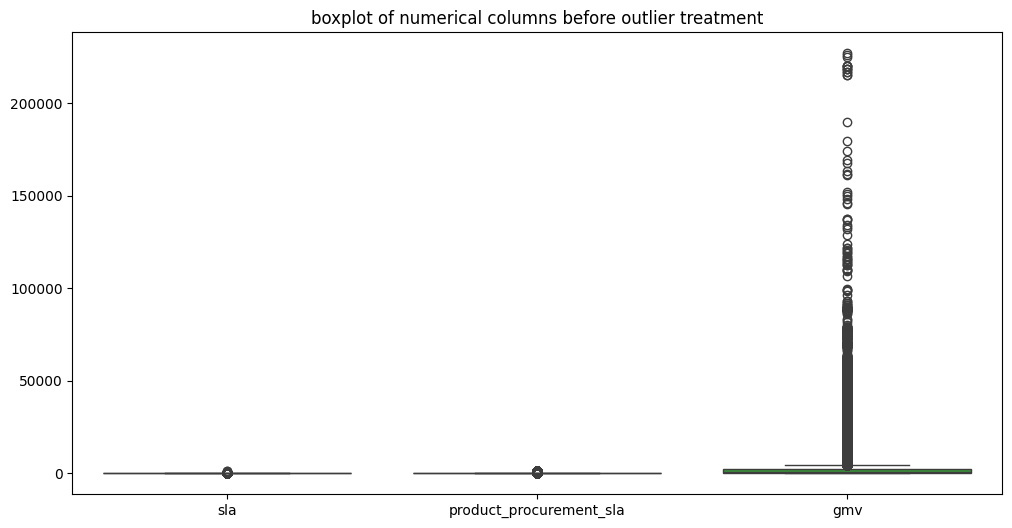

In [38]:
numerical_cols = ['sla', 'product_procurement_sla', 'gmv']

# boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title("boxplot of numerical columns before outlier treatment")
plt.show()

In [39]:
# Remove SLA Outliers (SLA of more than 30 days too rare & next to impossible)
df = df[df['sla'] <= 30]
print(f"Removed SLA outliers >30 days. Remaining Records: {df.shape[0]}")

Removed SLA outliers >30 days. Remaining Records: 1489932


In [40]:
 # Remove Negative Product Procurement SLA
df = df[df['product_procurement_sla'] >= 0]
print(f"Removed negative procurement SLA values. Remaining records: {df.shape[0]}")

Removed negative procurement SLA values. Remaining records: 1426505


In [41]:
df['product_procurement_sla'].value_counts(normalize=True)

product_procurement_sla
2       0.340432
3       0.193867
1       0.193424
5       0.139735
4       0.076624
0       0.026786
6       0.010109
7       0.007797
15      0.004268
14      0.003335
1000    0.002850
13      0.000337
8       0.000310
9       0.000060
12      0.000040
10      0.000027
Name: proportion, dtype: float64

In [42]:
# Remove High Product Procurement SLA (`>15 days`)
df = df[df['product_procurement_sla'] <= 15]
print(f"Removed product procurement SLA >15 days. Remaining records: {df.shape[0]}")

Removed product procurement SLA >15 days. Remaining records: 1422440


In [43]:
# Filter the dataset to keeep only the relevant Sub-Categorie
valid_subs = ['GamingAccessory', 'CameraAccessory', 'HomeAudio']
df = df[df['product_analytic_sub_category'].isin(valid_subs)]
print(f"shape of the dataset after filtering the dataset is {df.shape}")

shape of the dataset after filtering the dataset is (497561, 20)


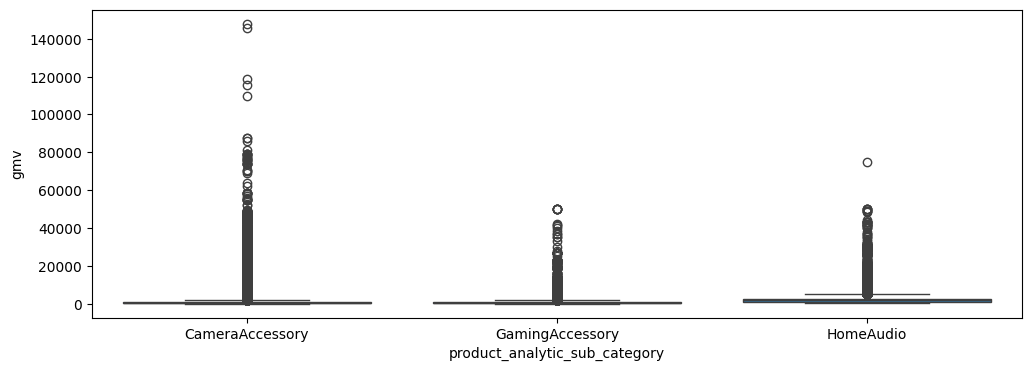

In [44]:
# Further Outlier analysis for GMV for each of the category
plt.figure(figsize = (12,4))
sns.boxplot(y = 'gmv',data = df, x = 'product_analytic_sub_category')
plt.show()

In [45]:
# Capping the gmv values for each of the categories to 0.95 quantile
cam_q95 = df.loc[(df.product_analytic_sub_category=='CameraAccessory')]['gmv'].quantile(0.95)
gam_q95 = df.loc[(df.product_analytic_sub_category=='GamingAccessory')]['gmv'].quantile(0.95)
hom_q95 = df.loc[(df.product_analytic_sub_category=='HomeAudio')]['gmv'].quantile(0.95)

camera = df.loc[(df.product_analytic_sub_category=='CameraAccessory') & (df.gmv<cam_q95)]
gaming = df.loc[(df.product_analytic_sub_category=='GamingAccessory') & (df.gmv<gam_q95)]
homeaudio = df.loc[(df.product_analytic_sub_category=='HomeAudio') & (df.gmv<hom_q95)]


In [46]:
# Further Outlier analysis for GMV for each of the category
# sns.boxplot(homeaudio['gmv'])

In [47]:
df.shape

(497561, 20)

In [48]:
df = pd.concat([camera, gaming, homeaudio], axis = 0)

In [49]:
# Dropping unnecessary columns
cols_to_drop = ['fsn_id',
                'order_item_id',
                'pincode',
                'product_analytic_super_category',
                'product_analytic_category']

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472664 entries, 2 to 1542377
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_date                     472664 non-null  datetime64[ns]
 1   Year                           472664 non-null  int64         
 2   Month                          472664 non-null  int64         
 3   order_id                       472664 non-null  object        
 4   gmv                            472664 non-null  float64       
 5   units                          472664 non-null  int64         
 6   s1_fact.order_payment_type     472664 non-null  object        
 7   sla                            472664 non-null  int64         
 8   cust_id                        472664 non-null  object        
 9   product_analytic_sub_category  472664 non-null  object        
 10  product_analytic_vertical      472664 non-null  object        
 11  prod

# Exploratory Data Analysis

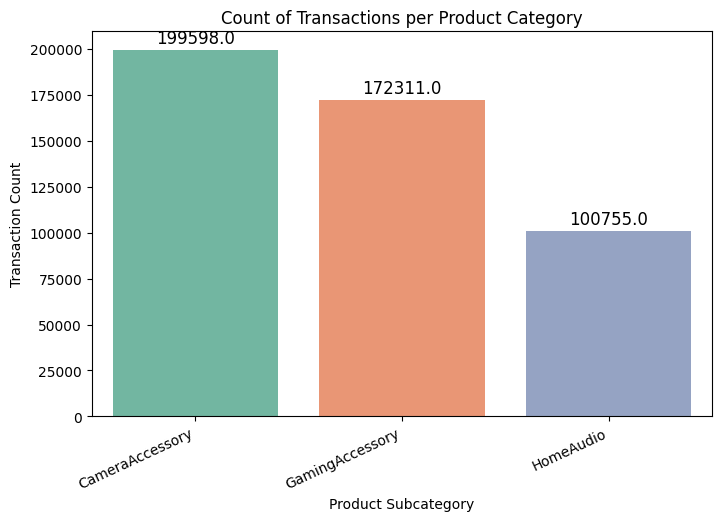

In [51]:
# Count of Transactions Per Category
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df,  x='product_analytic_sub_category', palette="Set2")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=25, ha="right")
plt.xlabel("Product Subcategory")
plt.ylabel("Transaction Count")
plt.title("Count of Transactions per Product Category")
plt.show()

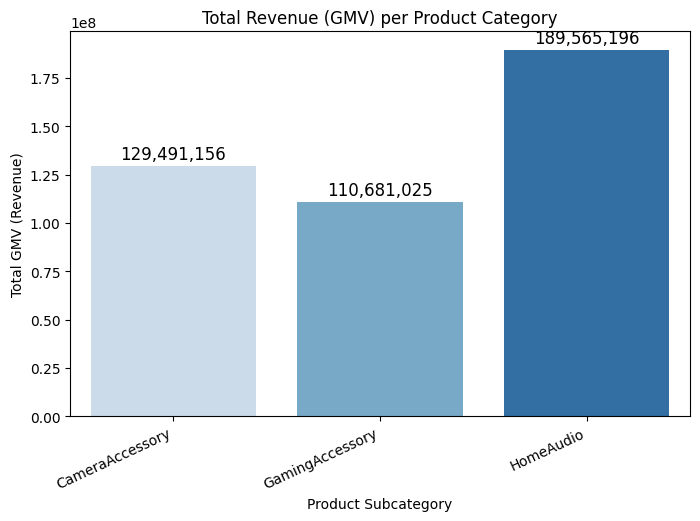

In [52]:
# Visualize Revenue (GMV) per Category ###
total_revenue = df.groupby('product_analytic_sub_category')['gmv'].sum().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=total_revenue, x='product_analytic_sub_category', y='gmv', palette="Blues")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0,5), textcoords='offset points')

plt.xticks(rotation=25, ha="right")
plt.xlabel("Product Subcategory")
plt.ylabel("Total GMV (Revenue)")
plt.title("Total Revenue (GMV) per Product Category")
plt.show()


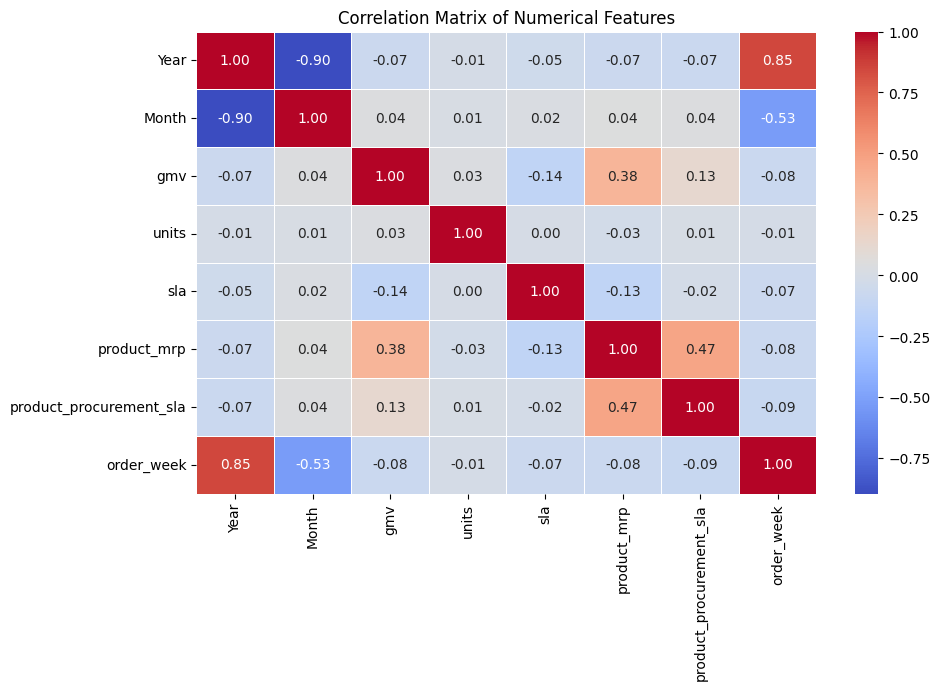

In [53]:
# Correlation Matrix ###
numeric_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute Correlation Matrix
plt.figure(figsize=(10,6))
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix of Numerical Features")
plt.show()

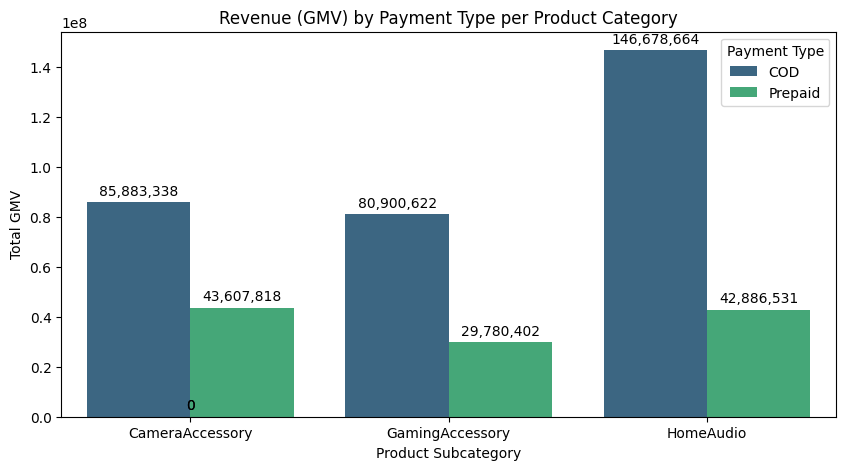

In [54]:
# Revenue (GMV) by Payment Type per Category ###
gmv_by_payment = df.groupby(["s1_fact.order_payment_type",
                             "product_analytic_sub_category"])['gmv'].sum().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=gmv_by_payment, x='product_analytic_sub_category',
                 y='gmv', hue="s1_fact.order_payment_type", palette="viridis")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')

plt.xlabel("Product Subcategory")
plt.ylabel("Total GMV")
plt.title("Revenue (GMV) by Payment Type per Product Category")
plt.legend(title="Payment Type")
plt.show()

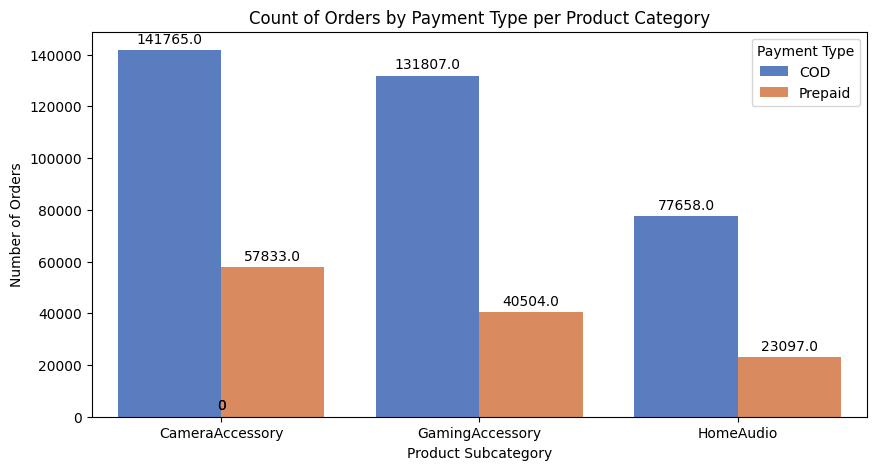

In [55]:
# Count of Orders by Payment Type per Category ###
orders_by_payment = df.groupby(["s1_fact.order_payment_type","product_analytic_sub_category"])['gmv'].count().reset_index().rename(columns={'gmv':'Count_of_Orders'})

plt.figure(figsize=(10,5))
ax = sns.barplot(data=orders_by_payment, x='product_analytic_sub_category', y='Count_of_Orders', hue="s1_fact.order_payment_type", palette="muted")

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')

plt.xlabel("Product Subcategory")
plt.ylabel("Number of Orders")
plt.title("Count of Orders by Payment Type per Product Category")
plt.legend(title="Payment Type")
plt.show()

In [56]:
# Segmenting Dataset by Product Subcategories ###
gamingAcc = df[df['product_analytic_sub_category'] == 'GamingAccessory'].drop('product_analytic_sub_category', axis=1)
cameraAcc = df[df['product_analytic_sub_category'] == 'CameraAccessory'].drop('product_analytic_sub_category', axis=1)
homeAudio = df[df['product_analytic_sub_category'] == 'HomeAudio'].drop('product_analytic_sub_category', axis=1)

print(f"Gaming Accessories Dataset Shape: {gamingAcc.shape}")
print(f"Camera Accessories Dataset Shape: {cameraAcc.shape}")
print(f"Home Audio Dataset Shape: {homeAudio.shape}")

Gaming Accessories Dataset Shape: (172311, 14)
Camera Accessories Dataset Shape: (199598, 14)
Home Audio Dataset Shape: (100755, 14)


# Feature Engineering

In [57]:
def order_week(order_week, year):
    if (year == 2016 and order_week<=26):
        return order_week + 53
    return order_week

In [58]:
import pandas as pd

def DictToDF(valsList, ColName):
    df = pd.DataFrame(valsList)

    # Convert to datetime
    df[ColName] = pd.to_datetime(df[ColName])

    # Extract year and week number (ensure week is int)
    df['order_week'] = df[ColName].dt.isocalendar().week.astype(int)
    df['year'] = df[ColName].dt.year.astype(int)

    # Apply function correctly
    df['order_week'] = df.apply(lambda x: order_week(int(x['order_week']), int(x['year'])), axis=1)

    # ✅ Add `total_*` column to count occurrences
    df["total_" + ColName + "s"] = 1

    # Drop the original date column to avoid summing errors
    df.drop(columns=[ColName], inplace=True)

    # Grouping by order_week and summing numerical columns only
    df = df.groupby('order_week').sum(numeric_only=True)

    # ✅ Add `is_*` column to indicate presence
    df[f"is_{ColName}"] = 1  

    # Drop the year column (already used)
    df.drop(columns=['year'], inplace=True)

    return df

In [59]:
# Defining the KPIs
def defineKPIs(df):
# Payment_mode
    df['payment_mode'] = df['s1_fact.order_payment_type'].apply(lambda x: 0 if x == "COD" else 1)
    
# Selling_price of each product
    df['selling_price'] = df['gmv']/df['units']
    
# Discount offered on each product
    df['discount'] = np.round((df['product_mrp']-df['selling_price'])/df['product_mrp'],2)
    
    return df

In [60]:
def weeklyAggCols():
    """
    Aggregates weekly event-related KPIs (Holidays, Special Sale Days, Pay Days)
    into a single DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with weekly counts of events.
    """
    # Define event categories and corresponding date lists
    event_dates = {
        "holiday": ["2016-01-01", "2016-02-16", "2016-02-14", "2016-03-17", "2016-04-03", "2016-04-06", 
                    "2016-05-10", "2016-05-18", "2016-06-21", "2016-06-24", "2015-07-01", "2015-08-03", 
                    "2015-09-07", "2015-10-12", "2015-10-31", "2015-11-11", "2015-12-25", "2015-12-26"],

        "special_sale_day": ["2015-07-18","2015-07-19","2015-08-15", "2015-08-16","2015-08-17","2015-08-28",
                             "2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17","2015-11-07",
                             "2015-11-08","2015-11-09","2015-11-10","2015-10-11","2015-10-12","2015-11-13",
                             "2015-11-14","2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29",
                             "2015-12-30","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21",
                             "2016-01-22","2016-02-01","2016-02-02","2016-02-20","2016-02-21","2016-02-14",
                             "2016-02-15","2016-03-07","2016-03-08","2016-03-09","2016-05-25","2016-05-26",
                             "2016-05-27"],

        "pay_day": ["2015-07-01","2015-07-15","2015-08-01","2015-08-15",
                    "2015-09-01","2015-09-15","2015-10-01","2015-10-15",
                    "2015-11-01","2015-11-15","2015-12-01","2015-12-15",
                    "2016-01-01","2016-01-15","2016-02-01","2016-02-15",
                    "2016-03-01","2016-03-15","2016-04-01","2016-04-15",
                    "2016-05-01","2016-05-15","2016-06-01","2016-06-15"]
    }

    # Generate DataFrames dynamically using DictToDF
    event_dfs = [DictToDF([ {key: date} for date in dates], key) for key, dates in event_dates.items()]

    # Merge all DataFrames on 'order_week' using OUTER JOIN to keep all weeks
    final_df = event_dfs[0]
    for df in event_dfs[1:]:
        final_df = final_df.merge(df, on='order_week', how='outer')

    # Fill missing values with 0 (ensures proper alignment)
    final_df = final_df.fillna(0).astype(int)

    return final_df

In [61]:
weeklyAggCols()

,total_holidays,is_holiday,total_special_sale_days,is_special_sale_day,total_pay_days,is_pay_day
order_week,,,,,,
27,1,1,0,0,1,1
29,0,0,2,1,1,1
31,0,0,0,0,1,1
32,1,1,0,0,0,0
33,0,0,2,1,1,1
34,0,0,1,1,0,0
35,0,0,3,1,0,0
36,0,0,0,0,1,1
37,1,1,0,0,0,0


In [62]:
# Adding the first three KPIs to each of the dataset
gamingAcc = defineKPIs(gamingAcc)
cameraAcc = defineKPIs(cameraAcc)
homeAudio = defineKPIs(homeAudio)

In [63]:
print(f"The shape of the camera dataset is {gamingAcc.shape}")
print(f"The shape of the camera dataset is {cameraAcc.shape}")
print(f"The shape of the camera dataset is {homeAudio.shape}")

The shape of the camera dataset is (172311, 17)
The shape of the camera dataset is (199598, 17)
The shape of the camera dataset is (100755, 17)


### 1. Defining KPIs for Product Analytical Vertical - Camera Accessory

In [64]:
# Aggregate units sold per product vertical & order week
prdVert_cam = (
    cameraAcc.groupby(['order_week', 'product_analytic_vertical'], as_index=False)['units']
    .sum()
)
# Pivot the table to reshape data (each vertical becomes a column)
cam_prdKPI = prdVert_cam.pivot(index='order_week', columns='product_analytic_vertical', values='units')

# Fill missing values with 0 and ensure numeric type
cam_prdKPI = cam_prdKPI.fillna(0).astype(int).reset_index()

# Drop product_analytic_vertical from the original dataset
cameraAcc.drop(columns=['product_analytic_vertical'], inplace=True)

In [65]:
cam_prdKPI.head(5)

product_analytic_vertical,order_week,Binoculars,CameraAccessory,CameraBag,CameraBattery,CameraBatteryCharger,CameraBatteryGrip,CameraEyeCup,CameraFilmRolls,CameraHousing,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,1,1,2,4,1,0,0,0,0,...,13,0,0,0,0,2,0,0,0,0
1,28,193,45,328,735,224,11,0,0,0,...,433,0,226,17,0,366,0,0,13,16
2,29,247,30,351,770,228,5,0,0,0,...,491,0,188,23,0,382,0,0,24,22
3,30,209,44,284,812,270,9,0,0,0,...,457,0,194,18,0,423,0,0,23,30
4,31,144,41,175,516,194,8,0,0,0,...,363,0,112,26,0,233,0,0,23,13


In [66]:
# Counting the products sold for each vertical within Camera Accessory
cam_units_sold = (
    prdVert_cam.groupby('product_analytic_vertical', as_index=False)['units']
    .sum()
    .sort_values('units', ascending=False)
)

cam_units_sold.head()

,product_analytic_vertical,units
15,Flash,48003
3,CameraBattery,35974
12,CameraTripod,31268
17,Lens,22800
2,CameraBag,15279


### 2. Defining KPIs for Product Analytical Vertical - Gaming Accessory

In [67]:
# Aggregate units sold per product vertical & order week
prdVert_gam = (
    gamingAcc.groupby(['order_week', 'product_analytic_vertical'], as_index=False)['units']
    .sum()
)

# Pivot the table to reshape data (each vertical becomes a column)
gam_prdKPI = (
    prdVert_gam.pivot(index='order_week', columns='product_analytic_vertical', values='units')
    .fillna(0)
    .astype(int)  # Ensuring numeric type directly
)

# Drop `product_analytic_vertical` from `gamingAcc`
gamingAcc.drop(columns=['product_analytic_vertical'], inplace=True)

In [68]:
# Count & sort total units sold per product vertical
gam_units_sold = (
    prdVert_gam.groupby('product_analytic_vertical', as_index=False)['units']
    .sum()
    .sort_values('units', ascending=False)
)

# Display top 5 selling verticals
gam_units_sold.head()

,product_analytic_vertical,units
6,GamingHeadset,59210
2,GamePad,48028
9,GamingMouse,34759
3,GamingAccessoryKit,8149
14,TVOutCableAccessory,6657


### 3. Defining KPIs for Product Analytical Vertical - Home Audio

In [69]:
# Aggregate units sold per product vertical & order week
prdVert_hom = (
    homeAudio.groupby(['order_week', 'product_analytic_vertical'], as_index=False)['units']
    .sum()
)

# Pivot the table to reshape data (each vertical becomes a column)
hom_prdKPI = (
    prdVert_hom.pivot(index='order_week', columns='product_analytic_vertical', values='units')
    .fillna(0)
    .astype(int)  # Ensuring numeric type directly
)

# Drop `product_analytic_vertical` from `homeAudio`
homeAudio.drop(columns=['product_analytic_vertical'], inplace=True)

In [70]:
# Count & sort total units sold per product vertical
hom_units_sold = (
    prdVert_hom.groupby('product_analytic_vertical', as_index=False)['units']
    .sum()
    .sort_values('units', ascending=False)
)

# Display top 5 selling verticals
hom_units_sold.head()

,product_analytic_vertical,units
6,HomeAudioSpeaker,72464
4,FMRadio,21132
9,VoiceRecorder,2650
0,BoomBox,1944
2,Dock,1883


### Defining KPI for Premium Product category.- Setting the cut-off as 75 percentile for premium products as per their GMV

In [71]:
cameraAcc['gmv'].describe()

count    199598.00000
mean        648.75979
std         781.57022
min          10.00000
25%         248.00000
50%         349.00000
75%         739.00000
max        6078.00000
Name: gmv, dtype: float64

In [72]:
# for camera
cam_q75 = cameraAcc['gmv'].quantile(0.75)
cameraAcc['premium_product'] = (cameraAcc['gmv'] > cam_q75).astype(int)
cameraAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2,2015-10-20,2015,10,2421912925714800.0,1990.0,1,COD,10,-1.0404429420466e+18,2099,3,2015-10-20 15:45:56,43,0,1990.0,0.05,1
3,2015-10-14,2015,10,4416592101738400.0,1690.0,1,Prepaid,4,-7.60496084352714e+18,2099,3,2015-10-14 12:05:15,42,1,1690.0,0.19,1
4,2015-10-17,2015,10,4419525153426400.0,1618.0,1,Prepaid,6,2.8945572083453e+18,2099,3,2015-10-17 21:25:03,42,1,1618.0,0.23,1
5,2015-10-17,2015,10,3419188825145600.0,3324.0,1,Prepaid,5,-7.64154636189174e+18,4044,5,2015-10-17 12:07:24,42,1,3324.0,0.18,1
6,2015-10-16,2015,10,3418428515041500.0,3695.0,1,Prepaid,6,-7.15614041481066e+16,4044,5,2015-10-16 14:59:57,42,1,3695.0,0.09,1


In [73]:
gamingAcc['gmv'].describe()

count    172311.000000
mean        642.332905
std         566.351112
min          39.000000
25%         279.000000
50%         417.000000
75%         799.000000
max        2889.000000
Name: gmv, dtype: float64

In [74]:
# for gaming
gam_q75 = gamingAcc['gmv'].quantile(0.75)
gamingAcc['premium_product'] = (gamingAcc['gmv'] > gam_q75).astype(int)
gamingAcc.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
1599,2015-10-14,2015,10,1416985339691600.0,2750.0,1,COD,7,9.04157730463172e+18,3999,5,2015-10-14 22:54:54,42,0,2750.0,0.31,1
1601,2015-10-17,2015,10,1419414998353400.0,2609.0,1,Prepaid,5,-4.82414273647179e+18,3999,5,2015-10-17 18:21:43,42,1,2609.0,0.35,1
1602,2015-10-26,2015,10,1427167582532600.0,2772.0,1,Prepaid,5,-3.30536529726028e+18,3999,5,2015-10-26 17:49:39,44,1,2772.0,0.31,1
1603,2015-10-16,2015,10,4417730112316700.0,2750.0,1,Prepaid,7,2.29779196616122e+18,3999,5,2015-10-16 04:02:08,42,1,2750.0,0.31,1
1607,2015-10-04,2015,10,4408070947414700.0,2750.0,1,COD,7,4.37192992283794e+18,3999,5,2015-10-04 15:19:00,40,0,2750.0,0.31,1


In [75]:
gamingAcc['gmv'].describe()

count    172311.000000
mean        642.332905
std         566.351112
min          39.000000
25%         279.000000
50%         417.000000
75%         799.000000
max        2889.000000
Name: gmv, dtype: float64

In [76]:
# for home Audio
home_q75 = homeAudio['gmv'].quantile(0.75)
homeAudio['premium_product'] = (homeAudio['gmv'] > gam_q75).astype(int)
homeAudio.head()

,order_date,Year,Month,order_id,gmv,units,s1_fact.order_payment_type,sla,cust_id,product_mrp,product_procurement_sla,order_datetime,order_week,payment_mode,selling_price,discount,premium_product
2870,2015-10-08,2015,10,1411753777965600.0,3700.0,1,COD,3,8.62812466774545e+18,4599,0,2015-10-08 21:34:04,41,0,3700.0,0.20,1
2871,2015-10-11,2015,10,2414104375842400.0,3700.0,1,COD,5,5.68493620255892e+18,4599,0,2015-10-11 16:54:52,41,0,3700.0,0.20,1
2872,2015-10-08,2015,10,4411629266828400.0,3700.0,1,COD,3,-1.12372975546978e+18,4599,0,2015-10-08 18:06:04,41,0,3700.0,0.20,1
5960,2015-10-01,2015,10,2405684398213000.0,2159.0,1,Prepaid,6,8.50907518697102e+18,2800,5,2015-10-01 21:02:49,40,1,2159.0,0.23,1
5961,2015-10-26,2015,10,3427126275487100.0,2159.0,1,COD,5,3.49030327610672e+17,2800,5,2015-10-26 16:41:40,44,0,2159.0,0.23,1


# Importing NPS + Stock Data and merging them with the dataset for each product category

In [77]:
import pandas as pd

# Step 1: Read the Excel file and transpose it
nps_stock = pd.read_excel(
    "Data/Media data and other information.xlsx",  # Adjust the file path
    sheet_name="Monthly NPS Score", 
    header=None  # Read without assuming first row as column names
).T  # Transpose the dataset

# Step 2: Set the first row as the column names
nps_stock.columns = nps_stock.iloc[0]  # Assign first row as header
nps_stock = nps_stock.iloc[1:].reset_index(drop=True)  # Remove the original header row

# Step 3: Rename columns
nps_stock.columns = ["DT", "NPS", "Stock Index"]

# Step 4: Convert 'DT' to datetime format
nps_stock['DT'] = pd.to_datetime(nps_stock['DT'], format="%b-%y", errors="coerce")

# Step 5: Extract Year and Month
nps_stock["Year"] = nps_stock["DT"].dt.year
nps_stock["Month"] = nps_stock["DT"].dt.month

# Step 6: Convert NPS and Stock Index to numeric types
nps_stock["NPS"] = pd.to_numeric(nps_stock["NPS"], errors="coerce")
nps_stock["Stock Index"] = pd.to_numeric(nps_stock["Stock Index"], errors="coerce")

# Step 7: Drop 'DT' since we now have 'Year' and 'Month'
nps_stock.drop(columns=["DT"], inplace=True)

# Display the cleaned DataFrame
nps_stock

,NPS,Stock Index,Year,Month
0,54.599588,1177,2015,7
1,59.987101,1206,2015,8
2,46.925419,1101,2015,9
3,44.398389,1210,2015,10
4,47.000000,1233,2015,11
5,45.800000,1038,2015,12
6,47.093031,1052,2016,1
7,50.327406,1222,2016,2
8,49.020550,1015,2016,3
9,51.827605,1242,2016,4


In [78]:
nps_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NPS          12 non-null     float64
 1   Stock Index  12 non-null     int64  
 2   Year         12 non-null     int32  
 3   Month        12 non-null     int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 416.0 bytes


In [79]:
# Adding the NPS feature/KPI to each of the 3 products
def add_nps_features(nps_df, product_df):
    return pd.merge(nps_df, product_df, on=["Month", "Year"], how="inner")

gamingAcc = add_nps_features(nps_stock, gamingAcc)
cameraAcc = add_nps_features(nps_stock, cameraAcc)
homeAudio = add_nps_features(nps_stock, homeAudio)

## Weekly Aggregation of Datasets

In [80]:
# Aggregate Weekly Data
gamingAcc_final = gamingAcc.groupby("order_week").agg(
    gmv=("gmv", "sum"),
    units=("units", "sum"),
    sla=("sla", "mean"),
    product_procurement_sla=("product_procurement_sla", "mean"),
    product_mrp=("product_mrp", "mean"),
    selling_price=("selling_price", "mean"),
    NPS=("NPS", "mean"),
    discount=("discount", "mean"),
    total_transactions=("order_id", "count"),
    total_premium_products=("premium_product", "count") 
).reset_index()

# Merge with Weekly Aggregated Data
gamingAcc_final = gamingAcc_final.merge(
    weeklyAggCols().reset_index(), on="order_week", how="left"
).fillna(0)

# Merge with Product Analytical Vertical Data
gamingAcc_final = gamingAcc_final.merge(
    gam_prdKPI, on="order_week", how="left"
).fillna(0)

# Display Data
gamingAcc_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,GamingChargingStation,GamingHeadset,GamingKeyboard,GamingMemoryCard,GamingMouse,GamingMousePad,GamingSpeaker,JoystickGamingWheel,MotionController,TVOutCableAccessory
0,27,2.234400e+04,24,3.458333,3.208333,3504.125000,931.000000,54.599588,0.316250,24,...,0,2,1,0,4,1,0,0,0,0
1,28,1.866719e+06,2767,5.375094,3.245660,1667.559623,685.125660,54.599588,0.421543,2650,...,0,177,424,36,966,55,0,11,16,73
2,29,1.585166e+06,2704,5.268747,2.721119,1638.086745,630.567636,54.599588,0.451228,2467,...,0,179,162,27,357,48,0,8,11,92
3,30,1.722134e+06,2231,5.459259,2.592130,2139.344907,784.834954,54.599588,0.398009,2160,...,0,283,170,28,448,67,0,9,11,93
4,31,1.298391e+06,1619,5.713094,3.237484,5311.397304,816.840180,54.603046,0.464647,1558,...,0,424,71,11,232,39,1,17,8,79


In [81]:
gamingAcc_final.shape

(53, 32)

In [82]:
gamingAcc_final.columns

Index(['order_week', 'gmv', 'units', 'sla', 'product_procurement_sla',
       'product_mrp', 'selling_price', 'NPS', 'discount', 'total_transactions',
       'total_premium_products', 'total_holidays', 'is_holiday',
       'total_special_sale_days', 'is_special_sale_day', 'total_pay_days',
       'is_pay_day', 'CoolingPad', 'GameControlMount', 'GamePad',
       'GamingAccessoryKit', 'GamingAdapter', 'GamingChargingStation',
       'GamingHeadset', 'GamingKeyboard', 'GamingMemoryCard', 'GamingMouse',
       'GamingMousePad', 'GamingSpeaker', 'JoystickGamingWheel',
       'MotionController', 'TVOutCableAccessory'],
      dtype='object')

In [83]:
# Aggregate Weekly Data
cameraAcc_final = cameraAcc.groupby("order_week").agg(
    gmv=("gmv", "sum"),
    units=("units", "sum"),
    sla=("sla", "mean"),
    product_procurement_sla=("product_procurement_sla", "mean"),
    product_mrp=("product_mrp", "mean"),
    selling_price=("selling_price", "mean"),
    NPS=("NPS", "mean"),
    discount=("discount", "mean"),
    total_transactions=("order_id", "count"),
    total_premium_products=("premium_product", "count")
).reset_index()

# Merge with Weekly Aggregated Data
cameraAcc_final = cameraAcc_final.merge(
    weeklyAggCols().reset_index(), on="order_week", how="left"
).fillna(0)

# Merge with Product Analytical Vertical Data
cameraAcc_final = cameraAcc_final.merge(
    cam_prdKPI, on="order_week", how="left"
).fillna(0)

# Display Data
cameraAcc_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,CameraTripod,ExtensionTube,Filter,Flash,FlashShoeAdapter,Lens,ReflectorUmbrella,Softbox,Strap,Telescope
0,27,15375.0,25,2.280000,2.960000,1456.840000,615.000000,54.599588,0.525600,25,...,13,0,0,0,0,2,0,0,0,0
1,28,2019042.0,2752,7.156274,2.742586,1646.428137,751.233460,54.599588,0.462194,2630,...,433,0,226,17,0,366,0,0,13,16
2,29,2249245.0,2917,6.491321,2.764789,1630.936238,783.509033,54.599588,0.465349,2823,...,491,0,188,23,0,382,0,0,24,22
3,30,2105858.0,2888,6.488138,2.831776,1560.504313,740.930625,54.599588,0.455913,2782,...,457,0,194,18,0,423,0,0,23,30
4,31,1426134.0,1932,6.470684,2.777959,1524.232356,756.820304,54.605438,0.450456,1842,...,363,0,112,26,0,233,0,0,23,13


In [84]:
cameraAcc_final.shape

(52, 39)

In [85]:
# Aggregate Weekly Data
homeAudio_final = homeAudio.groupby("order_week").agg(
    gmv=("gmv", "sum"),
    units=("units", "sum"),
    sla=("sla", "mean"),
    product_procurement_sla=("product_procurement_sla", "mean"),
    product_mrp=("product_mrp", "mean"),
    selling_price=("selling_price", "mean"),
    NPS=("NPS", "mean"),  # Now, NPS exists and won't cause an error
    discount=("discount", "mean"),
    total_transactions=("order_id", "count"),
    total_premium_products=("premium_product", "count")  # Summing instead of counting for accuracy
).reset_index()

# Merge with Weekly Aggregated Data
homeAudio_final = homeAudio_final.merge(
    weeklyAggCols().reset_index(), on="order_week", how="left"
).fillna(0)

# Merge with Correct Product Analytical Vertical Data
homeAudio_final = homeAudio_final.merge(
    hom_prdKPI, on="order_week", how="left"
).fillna(0)

# Display Data
homeAudio_final.head()

,order_week,gmv,units,sla,product_procurement_sla,product_mrp,selling_price,NPS,discount,total_transactions,...,BoomBox,DJController,Dock,DockingStation,FMRadio,HiFiSystem,HomeAudioSpeaker,SlingBox,SoundMixer,VoiceRecorder
0,27,7.366000e+04,32,3.093750,3.718750,4108.406250,2301.875000,54.599588,0.384687,32,...,4,0,0,0,2,0,26,0,0,0
1,28,3.394594e+06,1888,7.618513,2.797753,3024.204387,1810.233886,54.599588,0.335811,1869,...,60,0,30,1,478,13,1281,0,0,25
2,29,4.012062e+06,2204,7.157391,2.723084,3158.978558,1824.581204,54.599588,0.349612,2192,...,57,0,50,1,532,27,1511,0,0,26
3,30,3.560271e+06,2004,7.137966,2.802618,3155.295065,1781.471803,54.599588,0.348036,1986,...,65,0,56,0,509,20,1332,0,0,22
4,31,2.588403e+06,1419,7.291076,2.683428,3180.561615,1827.348442,54.599588,0.345241,1412,...,37,0,44,0,372,11,939,0,0,16


In [86]:
homeAudio_final.shape

(50, 27)

## Importing Media Investment data & and merging them with the dataset for each product category

In [87]:
media_investment = pd.read_excel("Data/Media data and other information.xlsx", sheet_name = 'Media Investment', header = 2)
media_investment

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,NaN,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,NaN,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,NaN,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,NaN,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,NaN,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN
5,NaN,2015.0,12.0,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,NaN,NaN
6,NaN,2016.0,1.0,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,NaN,2016.0,2.0,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,NaN,NaN
8,NaN,2016.0,3.0,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,NaN,2016.0,4.0,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,NaN,NaN


In [88]:
media_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         0 non-null      float64
 1   Year               12 non-null     float64
 2   Month              12 non-null     float64
 3   Total Investment   12 non-null     float64
 4   TV                 13 non-null     float64
 5   Digital            12 non-null     float64
 6   Sponsorship        12 non-null     float64
 7   Content Marketing  12 non-null     float64
 8   Online marketing   12 non-null     float64
 9    Affiliates        12 non-null     float64
 10  SEM                12 non-null     float64
 11  Radio              3 non-null      float64
 12  Other              3 non-null      float64
dtypes: float64(13)
memory usage: 1.8 KB


In [89]:
media_investment.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'Other'],
      dtype='object')

In [90]:
# Remove the first unnecessary column
media_investment = media_investment.iloc[:, 1:].copy()  

# Keep only the first 12 rows (Removing last 4 rows)
media_investment = media_investment.iloc[:12].reset_index(drop=True)

# Convert 'Year' & 'Month' to integer format
media_investment[['Year', 'Month']] = media_investment[['Year', 'Month']].astype(int)

# Fill missing values with 0 in investment columns
media_investment.fillna(0, inplace=True)

# Display cleaned data
media_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.00,0.000000
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.00,0.000000
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.00,0.000000
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.00,0.000000
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.00,0.000000
5,2015,12,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,0.00,0.000000
6,2016,1,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000
7,2016,2,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,0.00,0.000000
8,2016,3,100.024621,9.300000,2.100000,41.590000,0.370000,18.437818,6.217667,5.193591,0.87,15.945545
9,2016,4,56.848241,5.205196,0.871892,24.308354,0.034876,16.514510,5.693456,4.219958,0.00,0.000000


In [91]:
# Mapping the Months & no of weeks in order to convert the media data on a weekly basis
weeks_df = pd.DataFrame({
    "Month": range(1, 13), 
    "number_of_weeks": [4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5] })

weeks_df

,Month,number_of_weeks
0,1,4
1,2,4
2,3,5
3,4,4
4,5,4
5,6,5
6,7,4
7,8,4
8,9,5
9,10,4


In [92]:
# Merge media_investment with weeks_df BEFORE any normalization
media_investment = pd.merge(media_investment, weeks_df, on="Month", how="inner")

print(media_investment.columns) 

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'number_of_weeks'],
      dtype='object')


In [93]:
media_investment.columns

Index(['Year', 'Month', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'number_of_weeks'],
      dtype='object')

In [94]:
# Create new aggregated marketing investment columns
media_investment["Traditional Marketing"] = (
    media_investment["TV"] + media_investment["Radio"] + media_investment["Sponsorship"]
)

media_investment["Digital Marketing"] = (
    media_investment["Digital"] + media_investment["SEM"] +
    media_investment["Content Marketing"] + media_investment["Online marketing"]
)

media_investment["Partnership Marketing"] = (
    media_investment[" Affiliates"] + media_investment["Sponsorship"]
)

# If "Other" is still needed, keep it separately
media_investment["Other Marketing"] = media_investment["Other"]

# Drop the original granular columns since we now use the aggregated ones
media_investment.drop(columns=["TV", "Digital", "Sponsorship", "Content Marketing", 
                               "Online marketing", " Affiliates", "SEM", "Radio", "Other"], inplace=True)

In [95]:
# Normalize
investment_columns = ["Traditional Marketing", "Digital Marketing", "Partnership Marketing", "Other Marketing"]

# Check before dividing to avoid KeyError
if "number_of_weeks" in media_investment.columns:
    media_investment[investment_columns] = media_investment[investment_columns].div(media_investment["number_of_weeks"], axis=0)
else:
    raise KeyError("'number_of_weeks' column is missing! Check merge step.")

In [96]:
# Extract unique order_week, Month, and Year, keeping the last occurrence for each order_week
order_week = (
    df[["order_week", "Month", "Year"]]
    .drop_duplicates(subset="order_week", keep="last")  
    .sort_values(by=["order_week", "Month"]) 
    .reset_index(drop=True)  
)

# Merge order_week with media_investment on Month & Year
media_investment_weekly = (
    order_week
    .merge(media_investment, on=["Month", "Year"], how="inner")  # Perform an inner join
    .copy()
)

In [101]:
media_investment_weekly.head(5)

,order_week,Month,Year,Total Investment,number_of_weeks,Traditional Marketing,Digital Marketing,Partnership Marketing,Other Marketing
0,27,7,2015,17.061775,4,1.9074,2.22123,1.990381,0.0
1,28,7,2015,17.061775,4,1.9074,2.22123,1.990381,0.0
2,29,7,2015,17.061775,4,1.9074,2.22123,1.990381,0.0
3,30,7,2015,17.061775,4,1.9074,2.22123,1.990381,0.0
4,31,7,2015,17.061775,4,1.9074,2.22123,1.990381,0.0


In [102]:
def get_adstock_data(df, col_name, adstock_rate=0.5, carryover_weeks=5):
    """
    Computes the adstock effect for a given media investment channel.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'order_week' and the investment column.
    col_name (str): Column name of the media investment channel.
    adstock_rate (float): The decay rate applied to previous weeks' investments.
    carryover_weeks (int): The number of previous weeks to consider for carryover.

    Returns:
    pd.DataFrame: A DataFrame with 'order_week' and computed adstock column.
    """
    df = df.copy()
    adstock_values = []
    
    # Iterate over rows to compute adstock using a rolling sum approach
    for i in range(len(df)):
        weighted_sum = sum(
            (adstock_rate ** (j+1)) * df[col_name].iloc[i-j]
            for j in range(min(i+1, carryover_weeks))
        )
        adstock_values.append(df[col_name].iloc[i] + weighted_sum)
    
    df[f"adStock_{col_name}"] = adstock_values
    return df[['order_week', f"adStock_{col_name}"]]


In [103]:
### Compute Adstock Effect for Aggregated Columns

# Define new aggregated channels for Adstock computation
aggregated_channels = ["Traditional Marketing", "Digital Marketing", "Partnership Marketing", "Other Marketing"]

# Compute adstock for all aggregated marketing groups
adstock_dataframes = [
    get_adstock_data(media_investment_weekly[['order_week', col]], col, adstock_rate=0.5)
    for col in aggregated_channels
]

# Concatenate all adstock data into a final DataFrame
adstock_final = pd.concat(adstock_dataframes, axis=1)

# Drop redundant 'order_week' columns from concatenation
adstock_final = adstock_final.loc[:, ~adstock_final.columns.duplicated()]

In [104]:
### Merge Adstock Data with Weekly Investments

# Merge adstock data with original media investment dataset
adstock_final_data = media_investment_weekly.merge(adstock_final, on="order_week", how="inner")

# Drop original investment columns since they are now transformed into adstocks
adstock_final_data.drop(columns=aggregated_channels + ['Total Investment'], inplace=True)

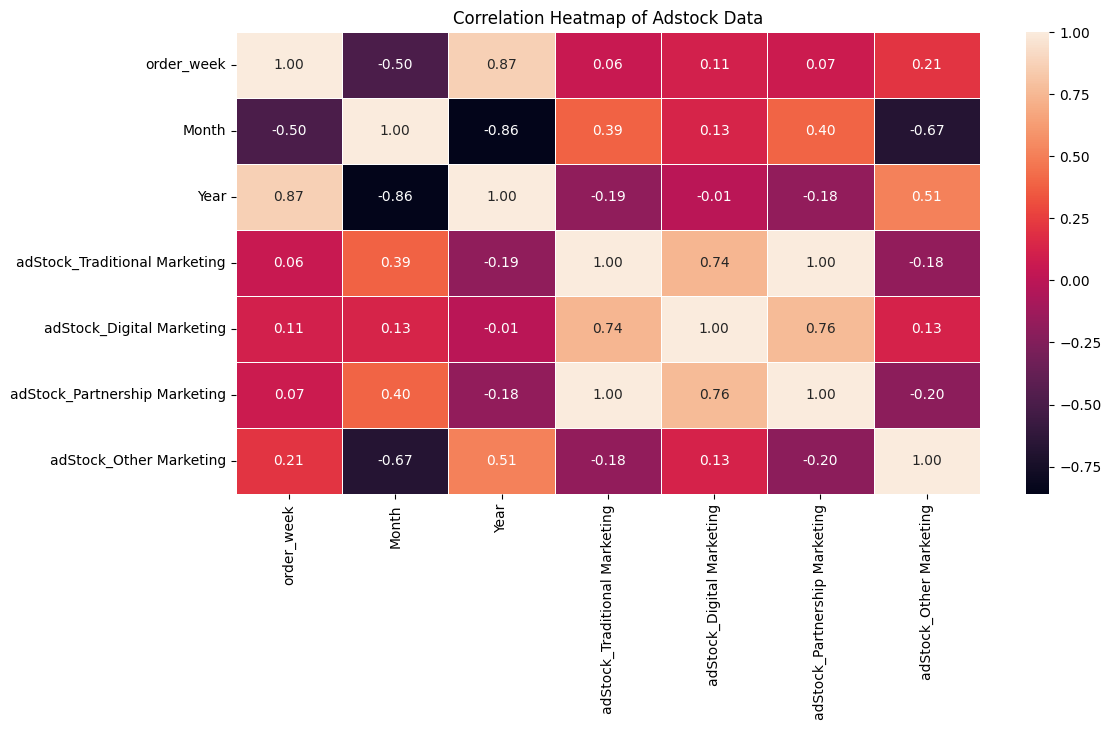

In [105]:
### Correlation Analysis

# Remove number_of_weeks column
adstock_final_data = adstock_final_data.drop(columns=['number_of_weeks'])

plt.figure(figsize=(12, 6))
sns.heatmap(adstock_final_data.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Adstock Data")
plt.savefig('Correlation.png')
plt.show()


In [106]:
### Merge Adstock Data with Product Categories

# Merging the adstock data with 3 product sub-categories
cameraAcc_final = pd.merge(adstock_final_data, cameraAcc_final, on="order_week", how='right')
gamingAcc_final = pd.merge(adstock_final_data, gamingAcc_final, on="order_week", how='right')
homeAudio_final = pd.merge(adstock_final_data, homeAudio_final, on="order_week", how='right')

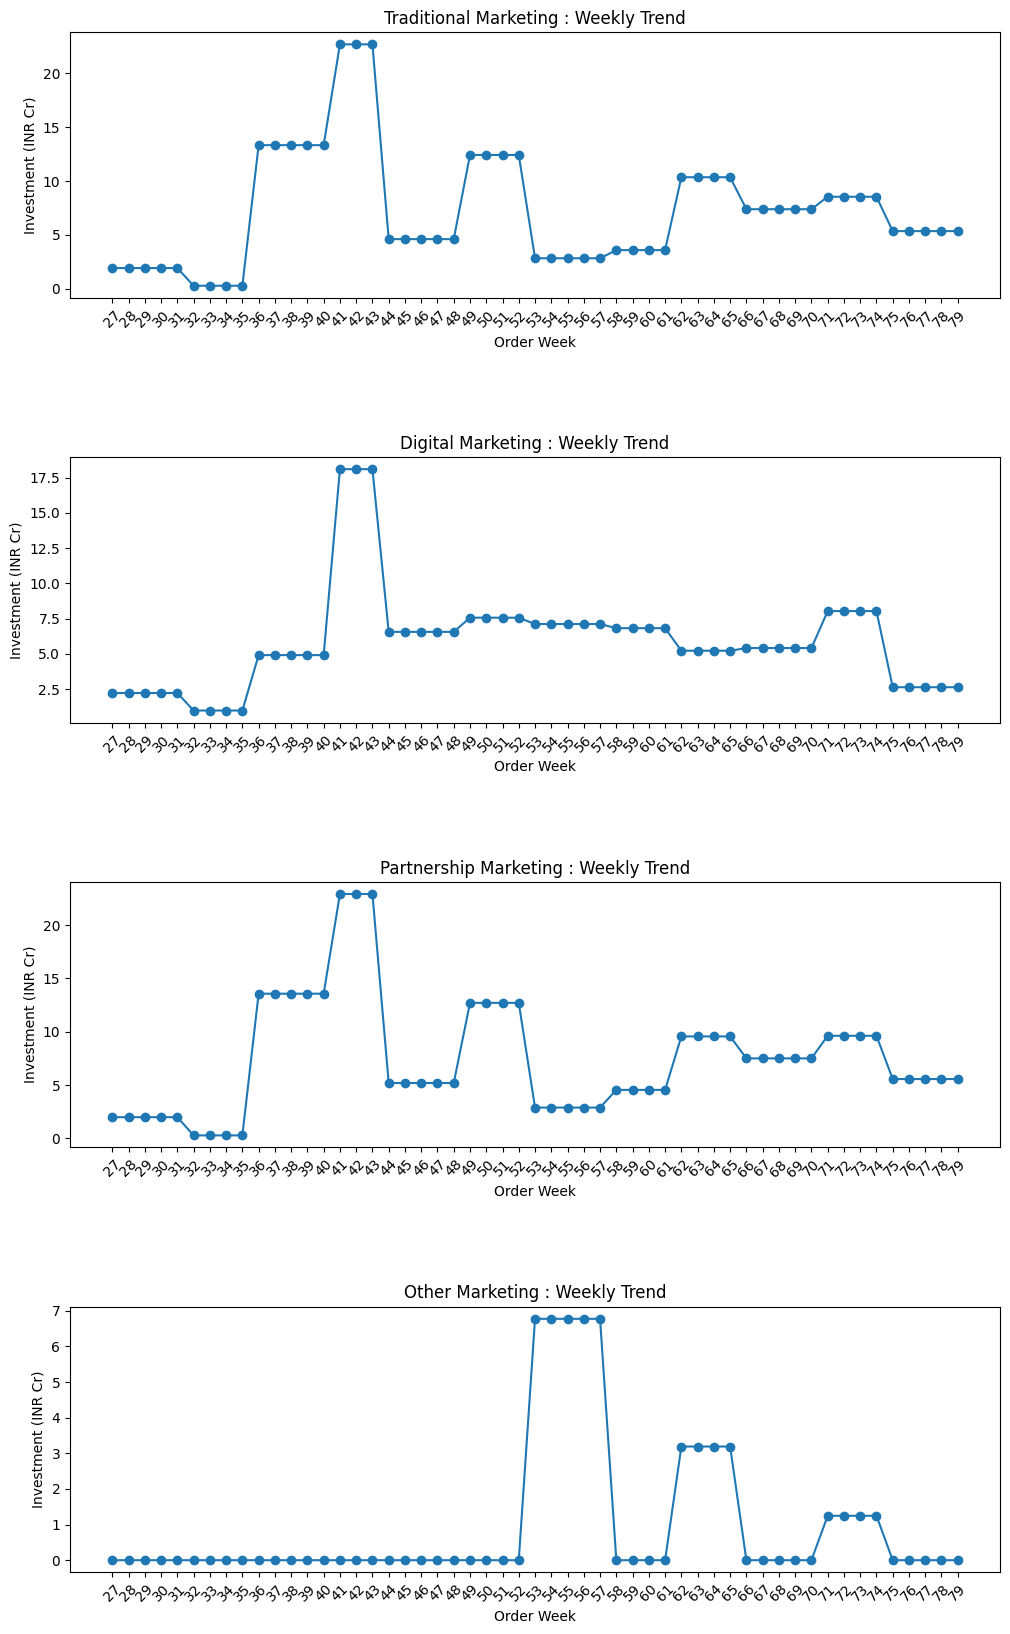

In [114]:
import matplotlib.pyplot as plt

# Define aggregated marketing investment channels
aggregated_channels = ["Traditional Marketing", "Digital Marketing", "Partnership Marketing", "Other Marketing"]

# Create figure with subplots dynamically
fig, axes = plt.subplots(len(aggregated_channels), 1, figsize=(12, 20))  # Reduced height for fewer channels

# Loop through channels and plot each on a separate subplot
for ax, channel in zip(axes, aggregated_channels):
    media_investment_weekly.plot(x="order_week", y=channel, ax=ax, legend=False, marker='o', linestyle='-')

    ax.set_title(f"{channel} : Weekly Trend")
    ax.set_ylabel("Investment (INR Cr)")
    ax.set_xlabel("Order Week")

    # Ensure X-ticks are displayed on all subplots
    ax.set_xticks(media_investment_weekly["order_week"])
    ax.set_xticklabels(media_investment_weekly["order_week"], rotation=45, fontsize=10)

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.6)  
plt.savefig("weekly_aggregated_media_investment_trends.png", dpi=300, bbox_inches="tight")
plt.show()


In [97]:
def get_adstock_data(df, col_name, adstock_rate=0.5, carryover_weeks=5):
    """
    Computes the adstock effect for a given media investment channel.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'order_week' and the investment column.
    col_name (str): Column name of the media investment channel.
    adstock_rate (float): The decay rate applied to previous weeks' investments.
    carryover_weeks (int): The number of previous weeks to consider for carryover.

    Returns:
    pd.DataFrame: A DataFrame with 'order_week' and computed adstock column.
    """
    df = df.copy()
    adstock_values = []
    
    # Iterate over rows to compute adstock using a rolling sum approach
    for i in range(len(df)):
        weighted_sum = sum(
            (adstock_rate ** (j+1)) * df[col_name].iloc[i-j]
            for j in range(min(i+1, carryover_weeks))
        )
        adstock_values.append(df[col_name].iloc[i] + weighted_sum)
    
    df[f"adStock_{col_name}"] = adstock_values
    return df[['order_week', f"adStock_{col_name}"]]


## Insights from the Correlation Heatmap of Adstock Data

### Strong Positive Correlations
adStock_SEM and adStock_Sponsorship (0.96) → Indicates that spending on SEM (Search Engine Marketing) and Sponsorship campaigns are highly correlated, meaning investments in these channels tend to increase or decrease together.
adStock_Affiliates and adStock_Online Marketing (0.99) → Suggests that affiliate marketing spend moves almost in tandem with online marketing spend, indicating possible campaign overlaps.
adStock_Radio and adStock_Other (0.96) → Suggests that investment trends in radio advertising closely follow other miscellaneous investments.


### Moderate Positive Correlations
adStock_Content Marketing and adStock_Sponsorship (0.72) → Content marketing investments appear moderately linked with sponsorship spending.
adStock_Digital and adStock_Sponsorship (0.68) → Digital media and sponsorship investments show a moderate correlation, suggesting partial dependency.
adStock_TV and adStock_Affiliates (0.72) → Indicates a tendency for TV and affiliate marketing budgets to move together.


### Negative Correlations
Month and adStock_Radio (-0.65) → Radio investment declines over time, suggesting a shift in budget away from traditional radio advertising.
Month and adStock_Other (-0.67) → Indicates that miscellaneous marketing spend has been decreasing with time.
Time-Based Trends

order_week and Year (0.87) → As expected, the order weeks progress with the year.
Month and Year (-0.86) → Since months reset every year, they show an inverse correlation with the overall year progression.


### Key Takeaways
SEM and Sponsorship investments are tightly linked, indicating they might be planned together in campaigns.
Affiliates and Online Marketing are highly interdependent, suggesting that shifts in one budget will likely impact the other.
Traditional media (Radio & Other) investments seem to be declining over time, which may indicate a shift towards digital marketing.
TV investment does not show a strong correlation with other channels, suggesting it's an independent budget allocation decision.

In [118]:
# # Mereging the adstock data with 3 prodyct sub categories
# cameraAcc_final = pd.merge(adstock_final_data,cameraAcc_final, on = "order_week", how = 'right')
# gamingAcc_final = pd.merge(adstock_final_data,gamingAcc_final, on = "order_week", how = 'right')
# homeAudio_final = pd.merge(adstock_final_data,homeAudio_final, on = "order_week", how = 'right')

In [119]:
print(f"The shape of the camera dataset is {cameraAcc_final.shape}")
print(f"The shape of the camera dataset is {gamingAcc_final.shape}")
print(f"The shape of the camera dataset is {homeAudio_final.shape}")

The shape of the camera dataset is (52, 45)
The shape of the camera dataset is (53, 38)
The shape of the camera dataset is (50, 33)


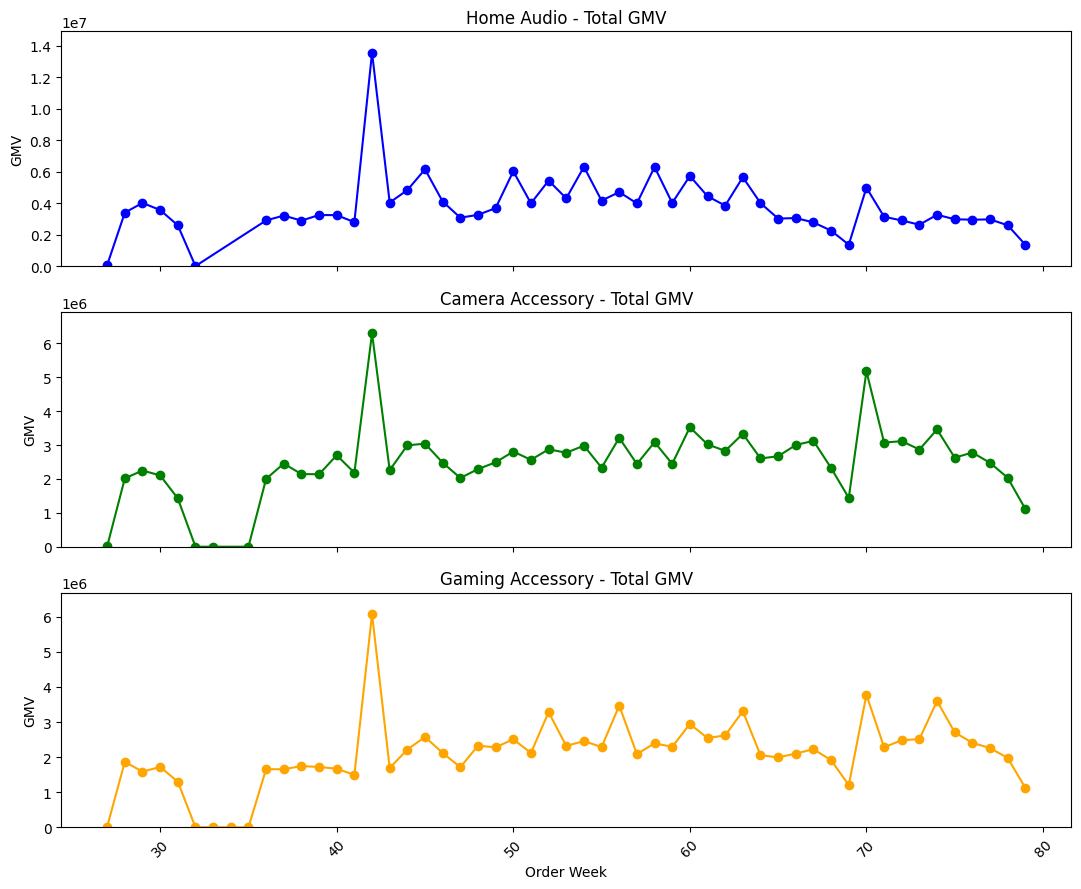

In [120]:
import matplotlib.pyplot as plt

# Define figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(11, 9), sharex=True)

# List of datasets, titles, and colors
categories = [
    (homeAudio_final, "Home Audio - Total GMV", "blue"),
    (cameraAcc_final, "Camera Accessory - Total GMV", "green"),
    (gamingAcc_final, "Gaming Accessory - Total GMV", "orange")
]

# Define GMV plotting function
def plot_gmv(ax, data, title, color):
    ax.plot(data['order_week'], data['gmv'], color=color, marker='o', linestyle='-')
    ax.set_title(title)
    ax.set_ylabel("GMV")
    
    # Dynamically adjust y-axis based on data range
    ax.set_ylim(0, data['gmv'].max() * 1.1)

# Loop through categories and plot each GMV trend
for ax, (data, title, color) in zip(axes, categories):
    plot_gmv(ax, data, title, color)

# Set common X-axis labels
axes[-1].set_xlabel("Order Week")
plt.xticks(rotation=45)

# Adjust layout for better spacing
fig.tight_layout()
plt.savefig("gmv_weekly_trend.png")
plt.show()


### Home Audio GMV:
Displays significant fluctuations over time.
A notable spike occurs around week 40, suggesting a promotional event or seasonal demand increase.
GMV stabilizes afterward but remains relatively volatile.

### Camera Accessory GMV:
Generally follows a steady pattern with smaller fluctuations.
A peak occurs around week 40, mirroring a similar pattern to Home Audio.
Another spike around week 70 suggests a potential promotional event or external influence.

### Gaming Accessory GMV:
Shows lower GMV values compared to Home Audio and Camera Accessory.
There is a clear peak around week 40, aligning with the spikes seen in the other categories.
After week 40, the trend stabilizes but remains slightly volatile.

### Common Trend Observations:
All three categories show spikes around week 40, indicating a potential common factor, such as a major sales event, holiday season, or marketing push.
GMV appears to decline toward the later weeks, possibly due to seasonal factors or a drop in demand after promotions.
Home Audio consistently maintains the highest GMV values, suggesting it is the strongest-performing category among the three.

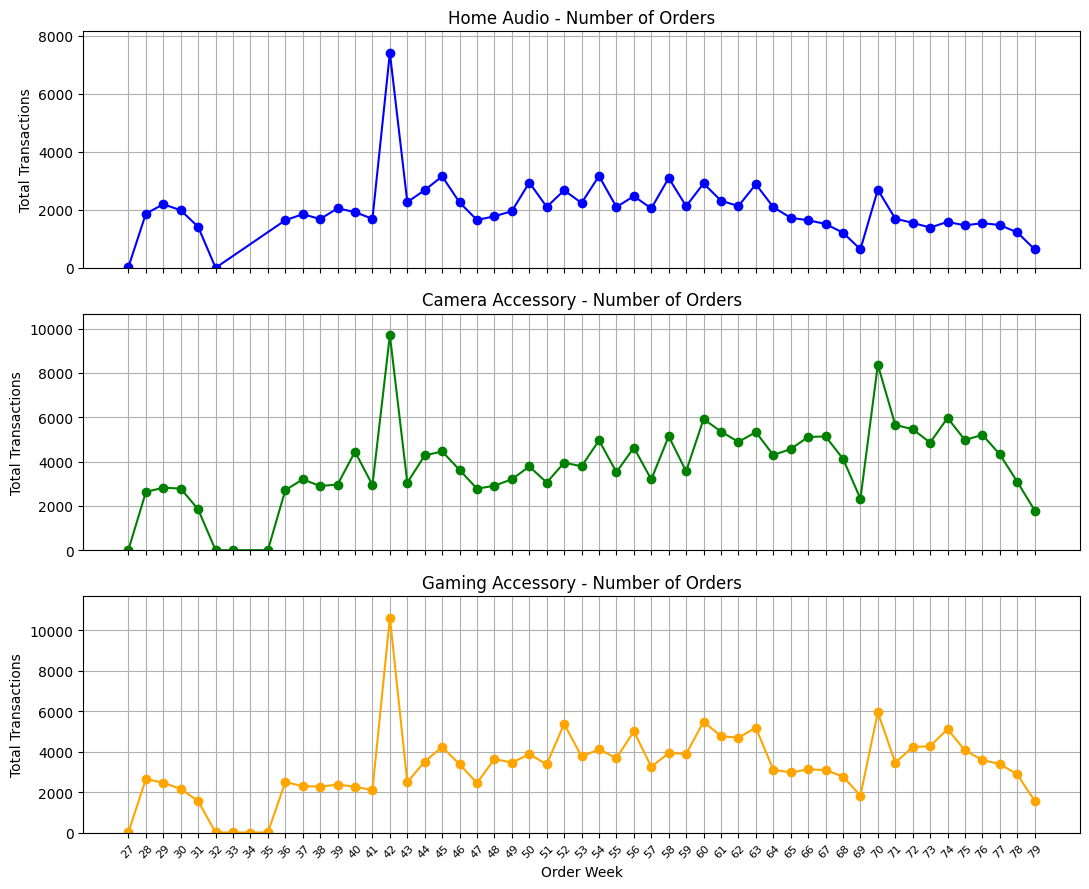

In [121]:
import matplotlib.pyplot as plt

# Define figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(11, 9), sharex=True)

# Define categories and colors
categories = [
    ("Home Audio", homeAudio_final, "blue"),
    ("Camera Accessory", cameraAcc_final, "green"),
    ("Gaming Accessory", gamingAcc_final, "orange"),
]

# Plot each category
for ax, (title, data, color) in zip(axes, categories):
    ax.plot(data["order_week"], data["total_transactions"], color=color, marker="o", linestyle="-")
    ax.set_title(f"{title} - Number of Orders")
    ax.set_ylabel("Total Transactions")
    
    # Dynamically adjust y-axis based on max value
    ax.set_ylim(0, data["total_transactions"].max() * 1.1)
    
    ax.grid(True)

# Set common x-axis label
axes[-1].set_xlabel("Order Week")

# Use the order weeks from the dataset with the highest number of weeks
reference_data = max(categories, key=lambda x: len(x[1]["order_week"]))[1]

axes[-1].set_xticks(reference_data["order_week"])
axes[-1].set_xticklabels(reference_data["order_week"], rotation=45, fontsize=8)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("number_of_orders_weekly_trend.png", dpi=300, bbox_inches="tight")
plt.show()


### Home Audio:
The number of transactions fluctuates between 1,000 and 3,000 for most of the weeks.
There's a major spike around week 40, where the transactions jump above 8,000, indicating a potential promotional event or seasonal trend.
Post this peak, the transactions stabilize with regular fluctuations and a gradual decline towards later weeks.

### Camera Accessory:
The transaction count follows an increasing trend initially, reaching around 6,000 to 8,000 orders per week in the mid-weeks.
A sharp peak around week 41 (crossing 10,000 orders) suggests a major promotional or seasonal sales event.
Another smaller spike is observed near week 70, possibly another promotional push or seasonal influence.
Towards the end, transaction volumes decline, aligning with trends seen in Home Audio.

### Gaming Accessory:
The number of orders remains relatively low (~2,000 orders per week) in the earlier weeks.
A sudden surge around week 42, surpassing 12,000 orders, suggests an aggressive marketing push or a seasonal sale.
After this spike, the orders return to a fluctuating range of 2,000 to 4,000 but show another increase around week 70.
The overall trend is slightly downward towards the later weeks.



### Sales Peaks Around Weeks 40-42 & Week 70:
- All three categories show strong peaks around week 40-42, indicating a common marketing event or seasonal sale.
- Another smaller spike around week 70 suggests another sale cycle.

### Post-Peak Stabilization:
- After the peak, sales normalize at lower levels but still maintain steady periodic fluctuations.

### Gaming Accessories Show the Most Drastic Spikes:
- Compared to other categories, gaming accessories experience the sharpest rise and fall in transaction volumes, possibly driven by short-lived sales events.

### Home Audio Has a More Stable Pattern:
- Compared to Camera and Gaming Accessories, Home Audio transactions do not fluctuate as sharply but still follow seasonal trends.

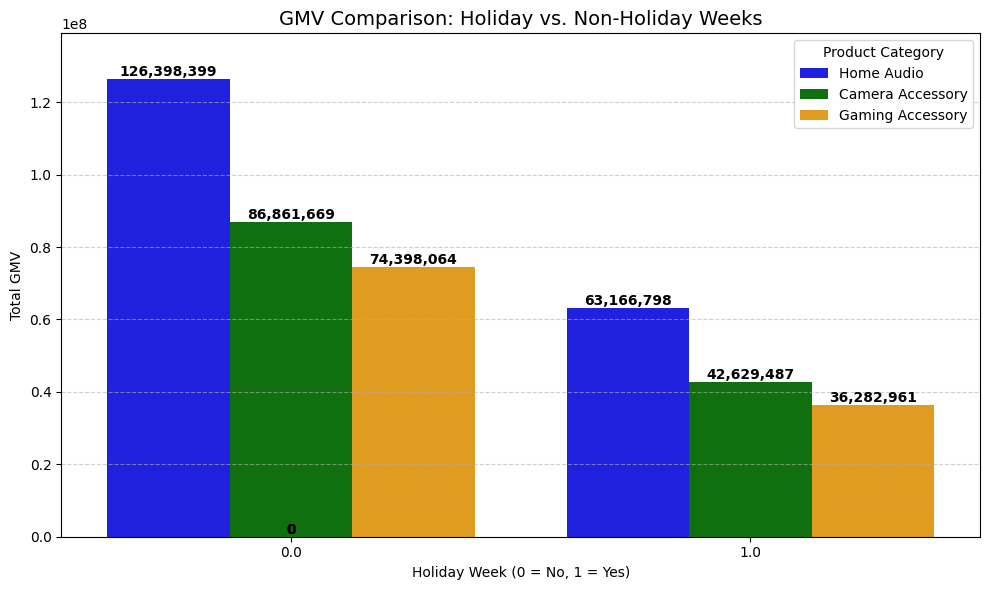

In [122]:
# Aggregate GMV for Holiday vs. Non-Holiday Weeks
holiday_gmv_ha = homeAudio_final.groupby('is_holiday', as_index=False)['gmv'].sum()
holiday_gmv_ha["Category"] = "Home Audio"

holiday_gmv_ca = cameraAcc_final.groupby('is_holiday', as_index=False)['gmv'].sum()
holiday_gmv_ca["Category"] = "Camera Accessory"

holiday_gmv_ga = gamingAcc_final.groupby('is_holiday', as_index=False)['gmv'].sum()
holiday_gmv_ga["Category"] = "Gaming Accessory"

# Combine all into a single DataFrame
holiday_gmv_combined = pd.concat([holiday_gmv_ha, holiday_gmv_ca, holiday_gmv_ga])

# Plot Holiday vs Non-Holiday GMV
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='is_holiday', y='gmv', hue='Category', data=holiday_gmv_combined, palette=["blue", "green", "orange"])

# Add labels to bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=10, fontweight="bold")

# Set titles and labels
ax.set_title("GMV Comparison: Holiday vs. Non-Holiday Weeks", fontsize=14)
ax.set_xlabel("Holiday Week (0 = No, 1 = Yes)")
ax.set_ylabel("Total GMV")
ax.set_ylim(0, holiday_gmv_combined["gmv"].max() * 1.1)  # Scale y-axis dynamically

plt.legend(title="Product Category")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Save and show the plot
plt.tight_layout()
plt.savefig("holiday_week_gmv_trends_combined.png", dpi=300)
plt.show()


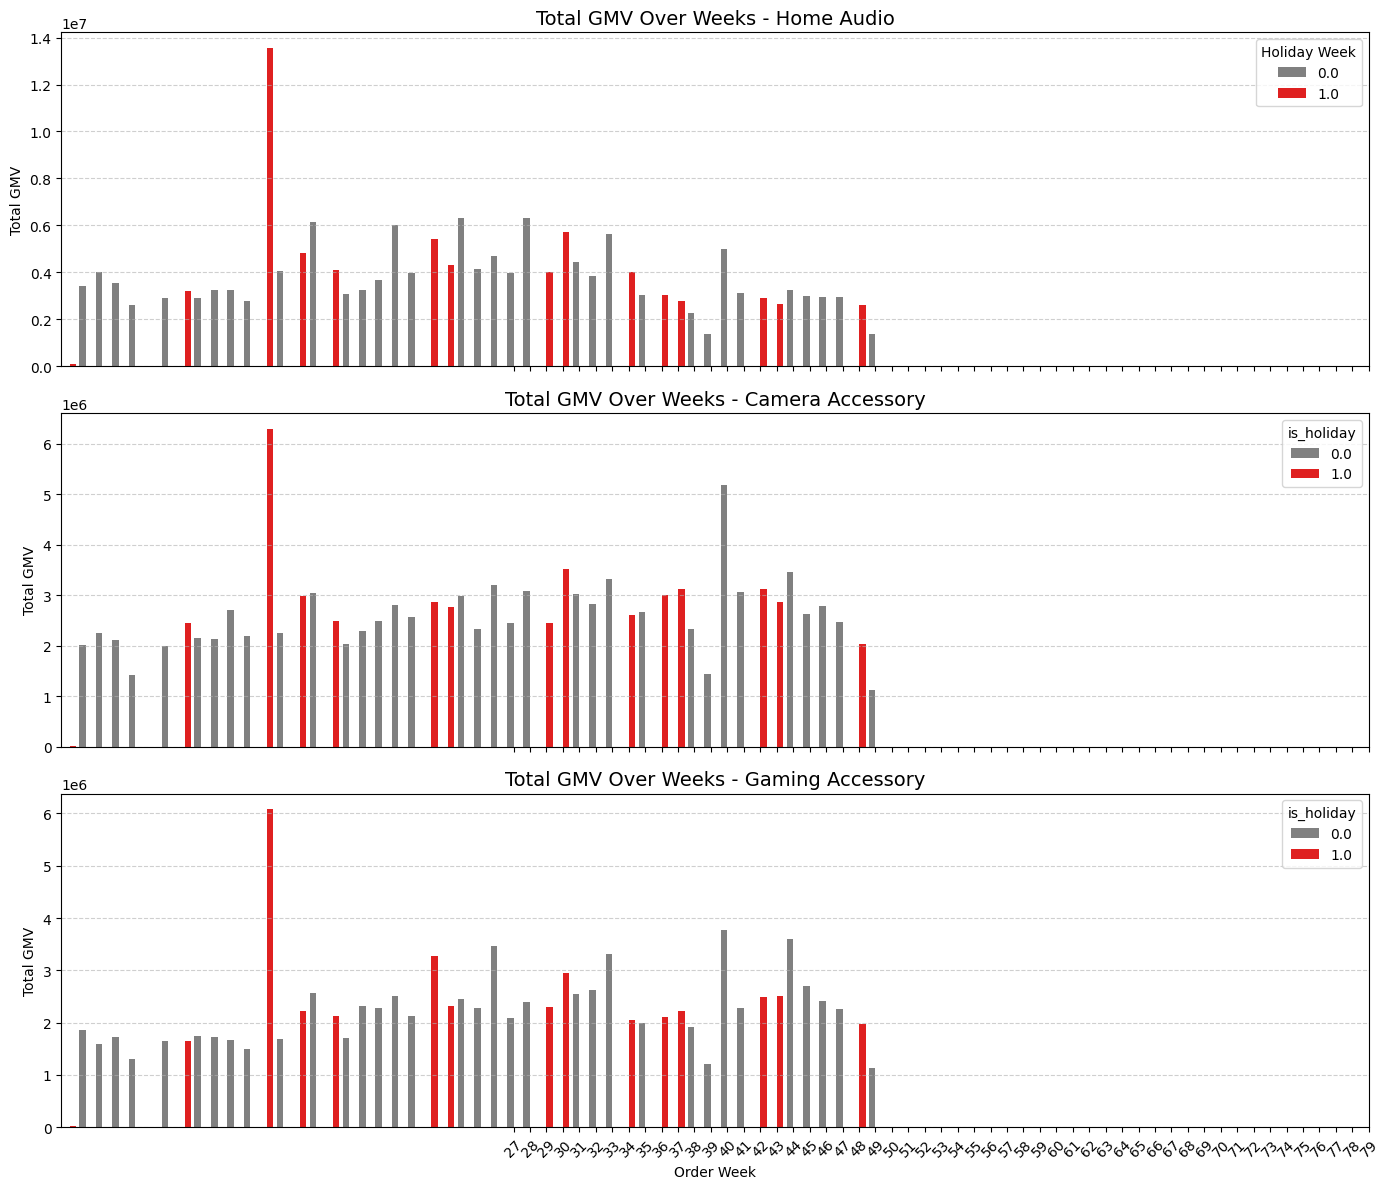

In [123]:
# Define data and titles for subplots
categories = [homeAudio_final, cameraAcc_final, gamingAcc_final]
titles = [
    "Total GMV Over Weeks - Home Audio",
    "Total GMV Over Weeks - Camera Accessory",
    "Total GMV Over Weeks - Gaming Accessory"
]

# Create figure and subplots dynamically
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Define color palette for holiday vs non-holiday
palette = {0: "gray", 1: "red"}

# Loop through datasets and plot
for ax, data, title in zip(axes, categories, titles):
    sns.barplot(x="order_week", y="gmv", hue="is_holiday", data=data, ax=ax, dodge=True, palette=palette)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Order Week")
    ax.set_ylabel("Total GMV")
    
    # Ensure X-Ticks are correctly displayed
    ax.set_xticks(data["order_week"])
    ax.set_xticklabels(data["order_week"], rotation=45, fontsize=10)
    
    # Add grid for better readability
    ax.grid(axis="y", linestyle="--", alpha=0.6)

# Adjust legend for clarity
axes[0].legend(title="Holiday Week", loc="upper right")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("gmv_weekly_trend_with_holiday.png", dpi=300)  
plt.show()

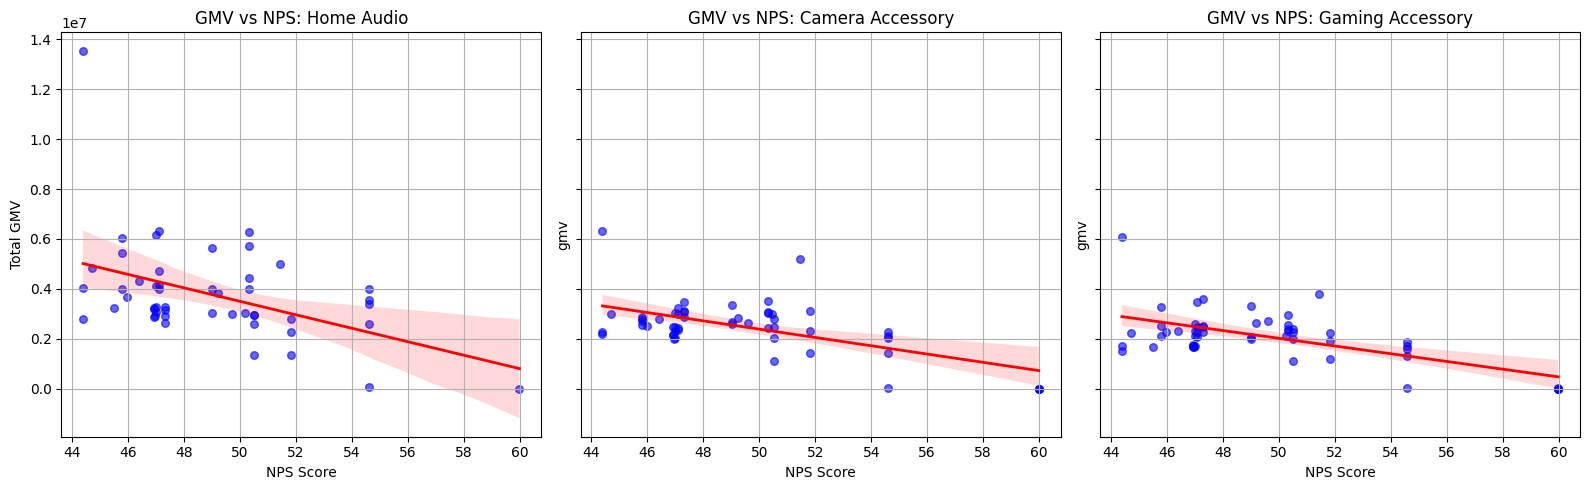

In [127]:
# Define categories and titles for subplots
categories = [homeAudio_final, cameraAcc_final, gamingAcc_final]
titles = [
    "GMV vs NPS: Home Audio",
    "GMV vs NPS: Camera Accessory",
    "GMV vs NPS: Gaming Accessory"
]

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# Define scatter & regression line style
scatter_style = {"alpha": 0.6, "color": "blue", "s": 30}  # s=30 for point size
line_style = {"color": "red", "lw": 2}  # Regression line in red

# Loop through datasets and plot
for ax, data, title in zip(axes, categories, titles):
    sns.regplot(x=data["NPS"], y=data["gmv"], ax=ax, scatter_kws=scatter_style, line_kws=line_style)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("NPS Score")
    ax.grid(True)

# Set shared Y-label
axes[0].set_ylabel("Total GMV")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("gmv_vs_nps_regression.png", dpi=300)
plt.show()


# Exporting the Data For Modelling

In [124]:
cameraAcc_final.to_csv("Modelling_Data/cameraAcc_final2.csv", index=False)

In [125]:
gamingAcc_final.to_csv("Modelling_Data/gamingAcc_final2.csv", index=False)

In [126]:
homeAudio_final.to_csv("Modelling_Data/homeAudio_final2.csv", index=False)